# **Trustworthy Machine Learning**
### Winter Semester 2022-2023
### Lecturer: Seong Joon Oh
### Tutor: Alexander Rubinstein
### **Exercise 1 -- OOD Generalisation**

---

**Group number**: >>> PLEASE FILL IN <<<

**Student names**: >>> PLEASE FILL IN <<<

**Student emails**: >>> PLEASE FILL IN <<<

---



#### **Submission deadline: 21/11/2022 at 23:59.**

In the first exercise, you will answer questions on the out-of-distribution (OOD) generalisation problems in machine learning.

#### **Policy for the first exercise**
This exercise is a **group exercise**. The same grade will be conferred to each member of the group based on the submission. Please report cases where any team member contributes significantly less than the other members of the same group. From the first exercise, the exercise grade will **count towards the final grade**.

####**Submission**
Follow the below four steps.

(1) Copy this colab file to your local gdrive;

`File > Save a copy in Drive`

(2) Work on the solution on your local copy;

(3) Pin the version for submission in history;

`Click on "All changes saved" or "Last saved at XX:XX AM/PM" next to the drop-down menus at the top > Select version to submit > Click on three vertical dots (vertical ellipsis) > Rename > Write "Submission" `

(4) Share your local colab with `stai.there@gmail.com` before the deadline.

`Click on "Share" at the top-right corner > Put stai.there@gmail.com in "Add people and groups" > Give the "Viewer" right and tick on "Notify people" > Click send.`

Note that we are able to see the edit history with time stamps, so please ensure that you stop working on your notebook before the deadline.

## **Out of distribution generalization**

## 1.1 Settings and real-world scenarios (5 points)

It is important to propose a plausible setting for studying ML methods. To make an argument that the proposed setting is indeed plausible, one would come up with an example real-world scenario. Let's try this.

**Description of the setting.**

- Development resources
  - Multiple image datasets $D_1$, $D_2$, $D_3$, …, $D_n$ with the same task (image classification with the possible set of class labels $Y$). Each dataset consists of IID samples from distributions $P_1$, $P_2$, …, $P_n$. Assume $P_i\neq P_j$ for all $i\neq j$. 
  - Every image sample $x$ is labelled with the image class $y\in Y$.
  - For each image $x$, you know which dataset it belongs to.
  - You have collected a few *unlabelled samples* $D_{n+1}$ from the deployment environment $P_{n+1}$.

- Deployment environment
  - The stream of inputs follow the distribution $P_{n+1}$. This distribution is different from those of the training datasets: $P_i \neq P_{n+1}$ for all $i\in\{1,...,n\}$.

**Q1**: How is this setting different from the "Domain Generalization" setting defined in Lecture 2? **(2 points)**

**Answer:** This setting assumes that we have some unlabelled samples from the deployment environment available. What differs from the "Domain Adaptation" setting is that we don't just have a single domain at development stage, but multiple ones. In our words, our setting is basically a combination of "Domain Generalization" and "Domain Adaptation". 

**Q2**: Can you present an example real-world scenario for this setting? **(3 points)**

**Answer:** Medical image analysis for example to detect if some cells of a patient are cancerous or not. At development time, we have a labelled set of ground truth data available. Each of these dates consists of an image of a cell for which we have a class label (cancerous or not) and domain label (which patient the image was taken from). 

At the deployment stage, we want to apply a trained model on several cells of a new patient, that might be cancerous or not. While the true class labels are unavailable, we still can integrate the unlabelled images with information about which patient it is into our development stage.


## 1.2 Identifying the exact setting in research work (4 + 4 = 8 points)

Read the paper "[Learning from Failure: Training Debiased Classifier from Biased Classifier](https://proceedings.neurips.cc/paper/2020/file/eddc3427c5d77843c2253f1e799fe933-Paper.pdf)" published at NeurIPS 2020. 

**Q1**: Identify an _exhaustive_ list of development resources used for training and selecting the model in the method `Learning from Failure`. This includes training/validation datasets and corresponding labels as well as any type of human guidance or wisdom. **(4 points)**

**To Do**

**Q2**: As we have seen in the lecture, feature selection is an impossible problem when the needed cue for the task is unknown to the learner. How does the `Learning from Failure` method provide this necessary information on the needed cue to the learner? Which assumptions on the task-relevant cue are made and how are they exploited by the given method? **(4 points)**

**To Do**



## 1.3 Equivalence of losses (5 + 5 = 10 points)

Again, the NeurIPS 2020 paper "[Learning from Failure: Training Debiased Classifier from Biased Classifier](https://proceedings.neurips.cc/paper/2020/file/eddc3427c5d77843c2253f1e799fe933-Paper.pdf)" defines the Generalized Cross Entropy (GCE) loss as follows:

\begin{equation*}
\text{GCE}(p(x; \theta), y, q) = \dfrac{1 - p_y(x;\theta)^q}{q}
\end{equation*}

where $p(x)\in[0,1]^{|Y|}$ is the prediction vector for input $x$ with probabilities $p_y$ for each class $y\in Y$ and $q>0$ is a scalar.

Given that the Cross Entropy (CE) loss is

\begin{equation*}
\text{CE}(p(x; \theta), y) = -\log p_y(x;\theta)
\end{equation*}

Prove the following:

- (5 points): For all $p$ and $y$, $\text{GCE}(p,y,q) \rightarrow \text{CE}(p,y)$ as $q\downarrow 0$.
- (5 points): For all $p$, $y$, and $q>0$,
 $$\dfrac{\partial\, \text{GCE}(p(x; \theta), y, q)}{\partial\, \theta} = p^q_y\,\dfrac{\partial\, \text{CE}(p(x; \theta), y)}{\partial\, \theta}.$$

 **To Do**

 Approach:

 a) Rule of de L'Hospital? Also works with integral formula of logarithm and monotone convergence.

 b) Cf. tablet.

## 1.4 Intro to dSprites dataset (2 + 3 = 5 points)

Note: for this and the following exercises we suggest using Google Colab environment with a GPU. If you exhausted your GPU-time limits you can register a new free Google account and continue working from it.

We will use [dSprites dataset](https://github.com/deepmind/dsprites-dataset) for all the experiments in this homework.
It contains images with different cues: color, shape, scale, orientation, horizontal and vertical positions (posX and posY).
  
Numbers of different values for each cue are the following:

- color: 3 (red, blue, green)
- shape: 3 (square, ellipse, heart)
- scale: 6 (from smallest to biggest)
- orientation: 40 (different angles)
- posX, posY: 32 (different coordinates)

Throughout this homework we will label images according to this values by uniformly distributing them into "NUM_CLASSES" classes.

In [ ]:
!pip install -q torchmetrics
!pip install -q gdown

     |████████████████████████████████| 529 kB 15.4 MB/s 


In [ ]:
!git clone --branch main https://github.com/AlexanderRubinstein/UT-TML.git &> /dev/null

In [ ]:
import os
import sys
import numpy as np
import random
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import copy
from IPython.display import clear_output
import gdown
from typing import (
    Dict,
    List,
    Tuple,
    Callable,
    Union,
    Any
)


# local modules
ROOT = "/content"
REPO_NAME = "UT-TML"
REPO_PATH = os.path.join(ROOT, REPO_NAME)
SRC_PATH = os.path.join(REPO_PATH, "src") 
sys.path.insert(0, SRC_PATH)
import utils  
import models
import datasets
from datasets import (
    DSPRITES_NPZ_PATH, 
    NUM_CLASSES,
    GROUND_TRUTH_CUE,
    EASY_TO_BIAS_CUE,
    IS_DSPRITES_COLORED,
    N_COLORS,
    TEST_DATASET_SIZE, 
    TRAIN_DATASET_SIZE,
    DEFAULT_DSPRITES_HOLDER_ARGS
)
import train
import experiments
sys.path = sys.path[1:]


DSPRITES_NPZ_URL = (
    "https://github.com/deepmind/dsprites-dataset/raw/master/"
    "dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz"
)
ADVERSARIALLY_ATTACKED_CUE = "shape"

DEFAULT_START_LR = 0.01


OFF_DIAG_PROPORTION = 0.01
INVERTED_OFF_DIAG_PROPORTION = (
    int(1 / OFF_DIAG_PROPORTION) if OFF_DIAG_PROPORTION != 0 else 1
)
RANDOM_SEED = 42


# DANN params
ALPHA = 10
BETA = 0.75
GAMMA = 10
D_LAMBDA = 1


# adversarial attack params
FGSM_EPS = 0.1
FGSM_ALPHA = 0.5 


CACHE_PATH = "/tmp/ood_cache"


HELPER_FILES_FOLDER_URL = (
    "https://drive.google.com/drive/folders/"
    "1wDHu0gktM_39NNCB-ru7ewVg-9MVfq-z?usp=sharing"
)
HELPER_FILES_PATH = "./1_ood"


utils.apply_random_seed(RANDOM_SEED)
%matplotlib inline

Let's download dSprites dataset and helper files:

In [ ]:
if not os.path.exists(DSPRITES_NPZ_PATH):
    os.system(f"wget {DSPRITES_NPZ_URL} -O {DSPRITES_NPZ_PATH}")
if not os.path.exists(HELPER_FILES_PATH):
    gdown.download_folder(
        HELPER_FILES_FOLDER_URL, 
        output=HELPER_FILES_PATH, 
        quiet=True
    )

Very often in this homework we will use functions that will have names like "prepare_something_maker". They will be used to create factories (functions that make objects) which will be named like "make_something". 

These factories will be used to create almost all objects for our experiemnts (dataloaders, criterions, models, metrics, optimizers, schedulers, etc). Created objects will be pickled and saved in "CACHE_PATH" to just read them from the disk next time we want to create them again.

Let's create a dataloader (making a correspondnig factory by [datasets.prepare_default_dsprites_dataloaders_maker](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/datasets.py#L824-L963)) that gives multiple labels. Each label will correspond to each cue:



In [ ]:
test_multilabel_dataloaders \
    = datasets.prepare_default_dsprites_dataloaders_maker(
        is_multilabel=True,
        split="test",
        dataset_size=TEST_DATASET_SIZE
    )(None)

Saved cached dsprites_holder into /tmp/ood_cache/dsprites_holder_693439d4be339e36364e.pkl
Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Saved cached default_dsprites_dataloaders into /tmp/ood_cache/default_dsprites_dataloaders_6049af145a21f36ab291.pkl


We can visualize first batch of this dataloader using [utils.show_dataloader_first_batch](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/utils.py#L439-L470):

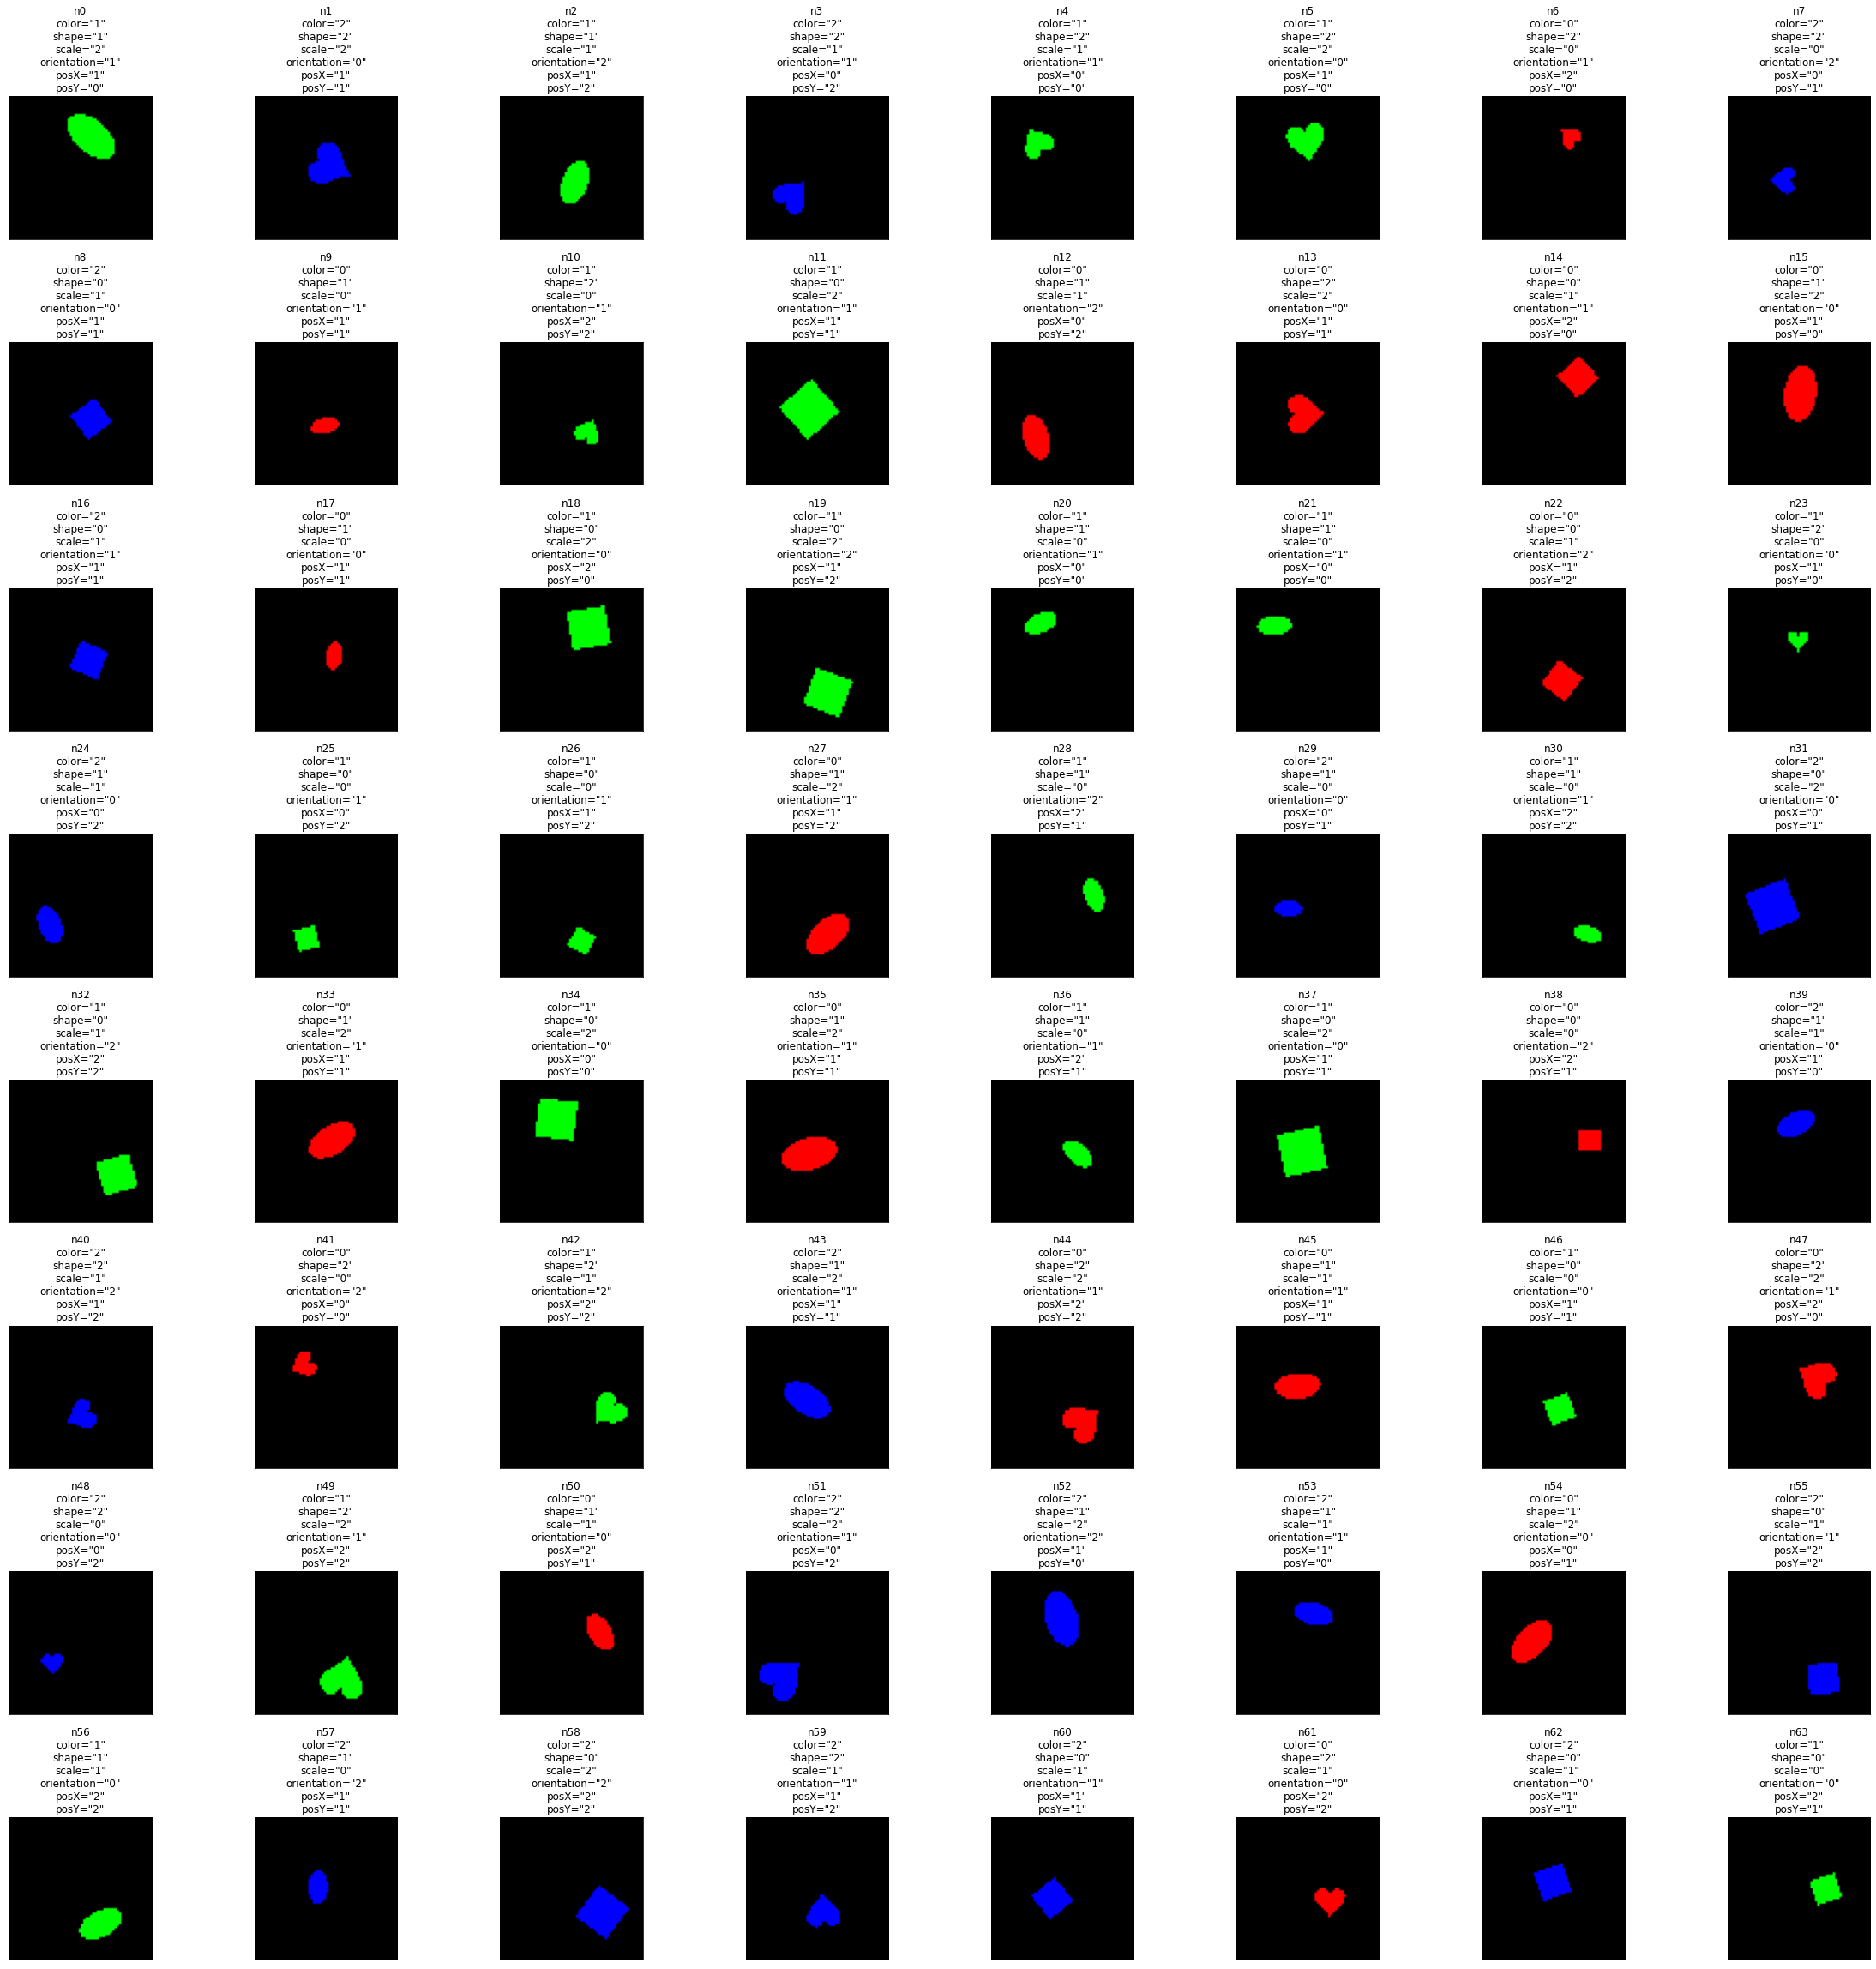

In [ ]:
test_multilabel_dataloader = test_multilabel_dataloaders["all_cues"]
utils.show_dataloader_first_batch(
    test_multilabel_dataloader, 
    test_multilabel_dataloader.cue_names
)


Let's create a model (using [models.prepare_resnet18_maker](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/models.py#L98-L111)) and evaluate it (using [train.eval_model_on_test](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L406-L448)) by computing accuracy (created by [train.make_accuracy](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L451-L452)) on the above dataloader without any training (it should give random predictions). 

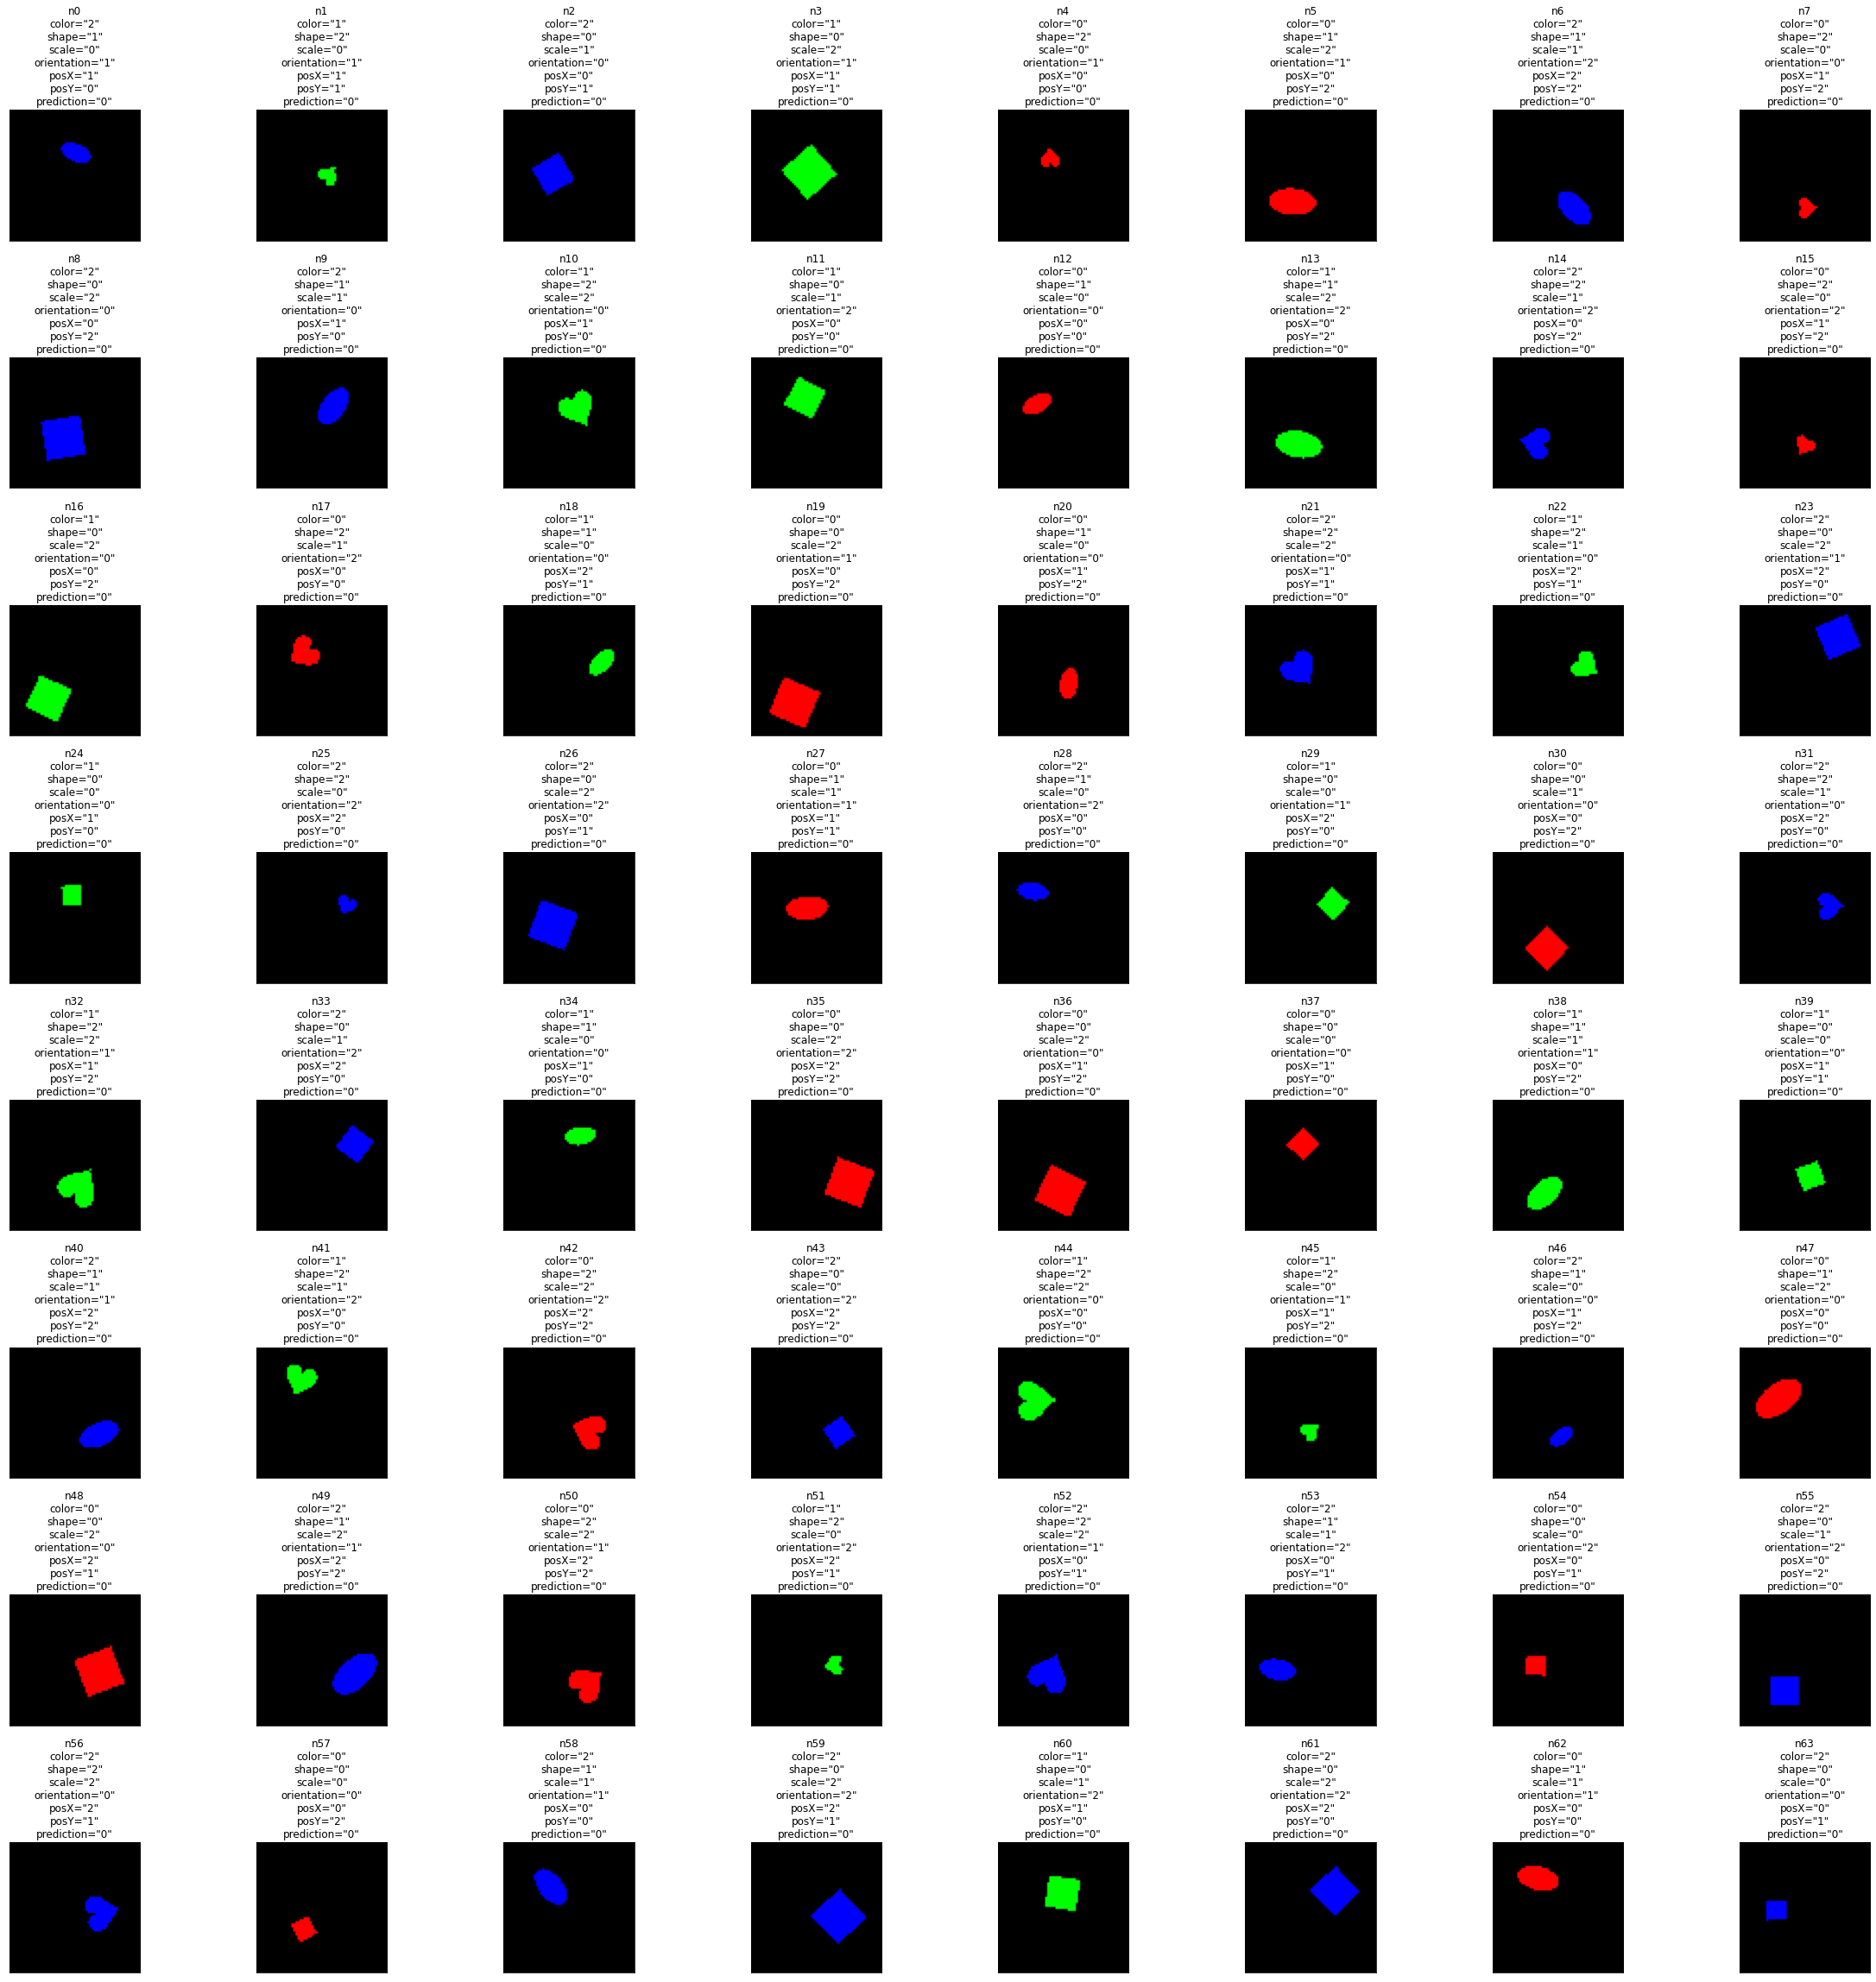

                            
Test on all_cues Accuracy for color: 0.334
Test on all_cues Accuracy for shape: 0.336
Test on all_cues Accuracy for scale: 0.335
Test on all_cues Accuracy for orientation: 0.351
Test on all_cues Accuracy for posX: 0.35
Test on all_cues Accuracy for posY: 0.346


In [ ]:
random_model = models.prepare_resnet18_maker(
    pretrained=False, 
    n_channels=N_COLORS, 
    n_classes=NUM_CLASSES
)()

train.eval_model_on_test(
    random_model, 
    test_multilabel_dataloaders, 
    make_metric=train.make_accuracy
)

Let's load from disk and evaluate some pre-made models on this dataloader.

In [ ]:
# load pre-made models 
model_A_path = os.path.join(HELPER_FILES_PATH, "model_A")
model_B_path = os.path.join(HELPER_FILES_PATH, "model_B")

if IS_DSPRITES_COLORED:
    model_A_path += "_colored"
    model_B_path += "_colored"

model_A = utils.default_load_func(model_A_path)
model_B = utils.default_load_func(model_B_path)

## Evaluate model_A and model_B as in the example above and tell which cues they are trained to predict (2 points).

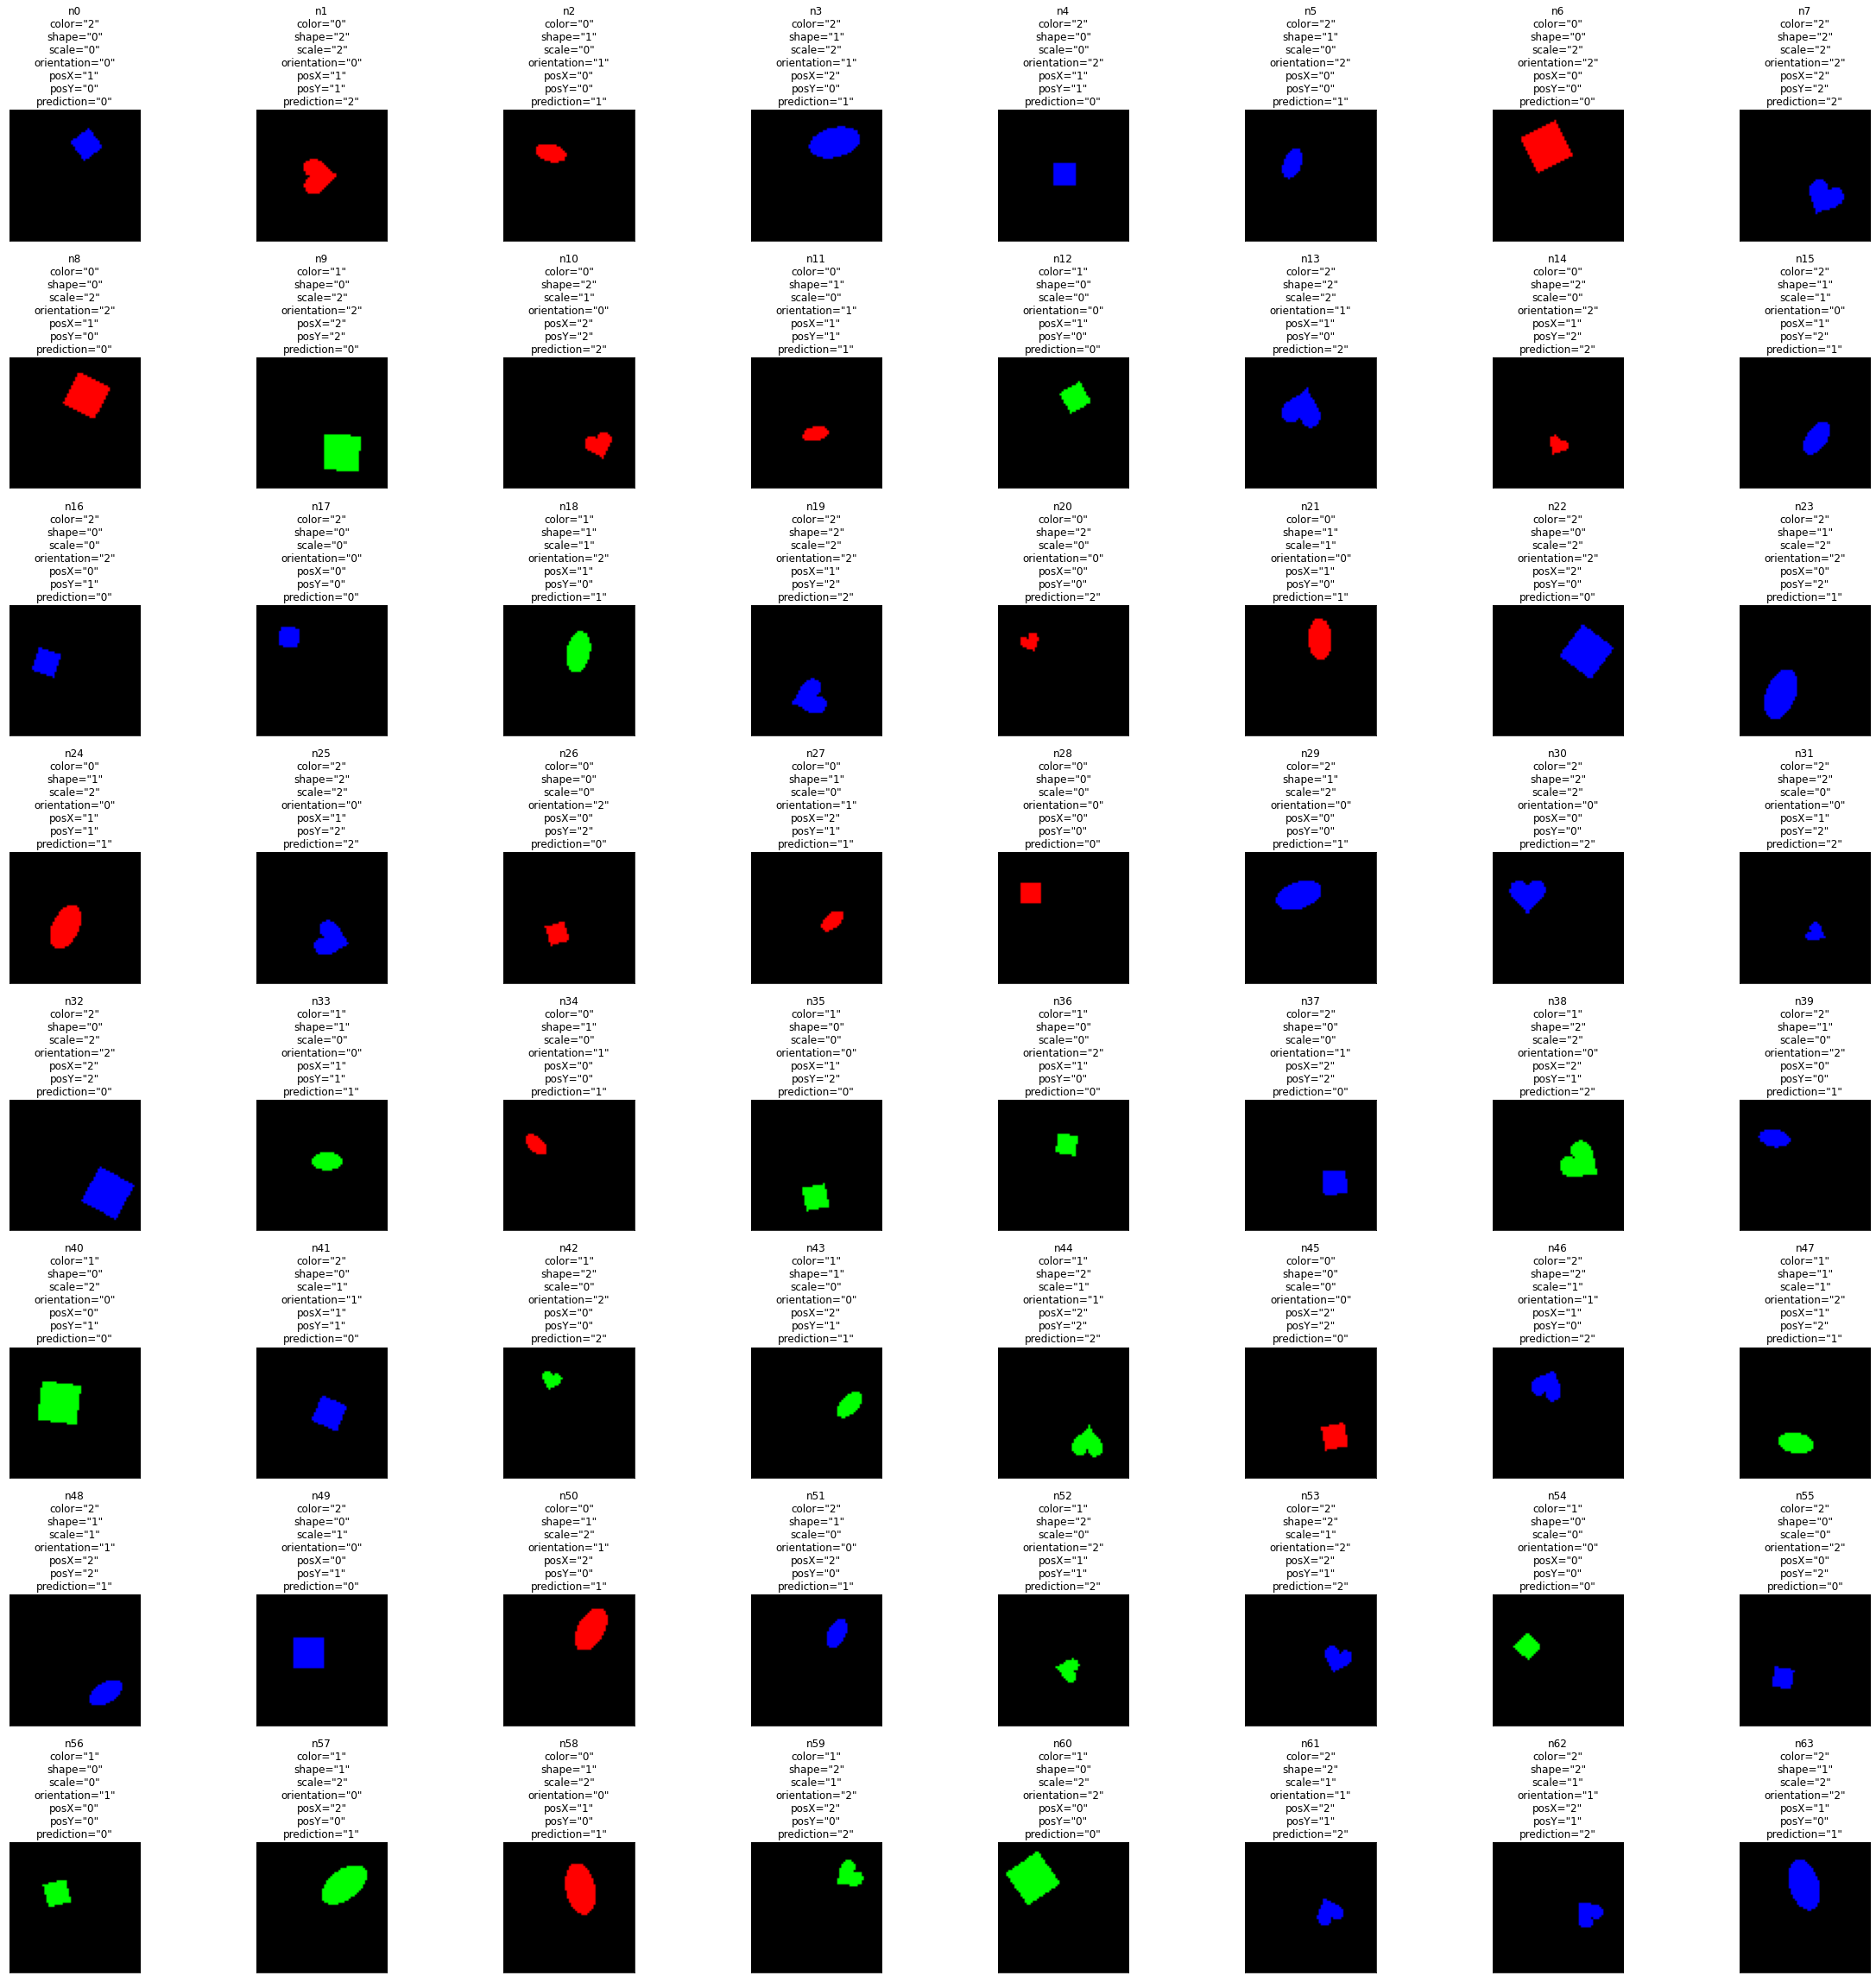

                            
Test on all_cues Accuracy for color: 0.334
Test on all_cues Accuracy for shape: 0.998
Test on all_cues Accuracy for scale: 0.332
Test on all_cues Accuracy for orientation: 0.336
Test on all_cues Accuracy for posX: 0.334
Test on all_cues Accuracy for posY: 0.333


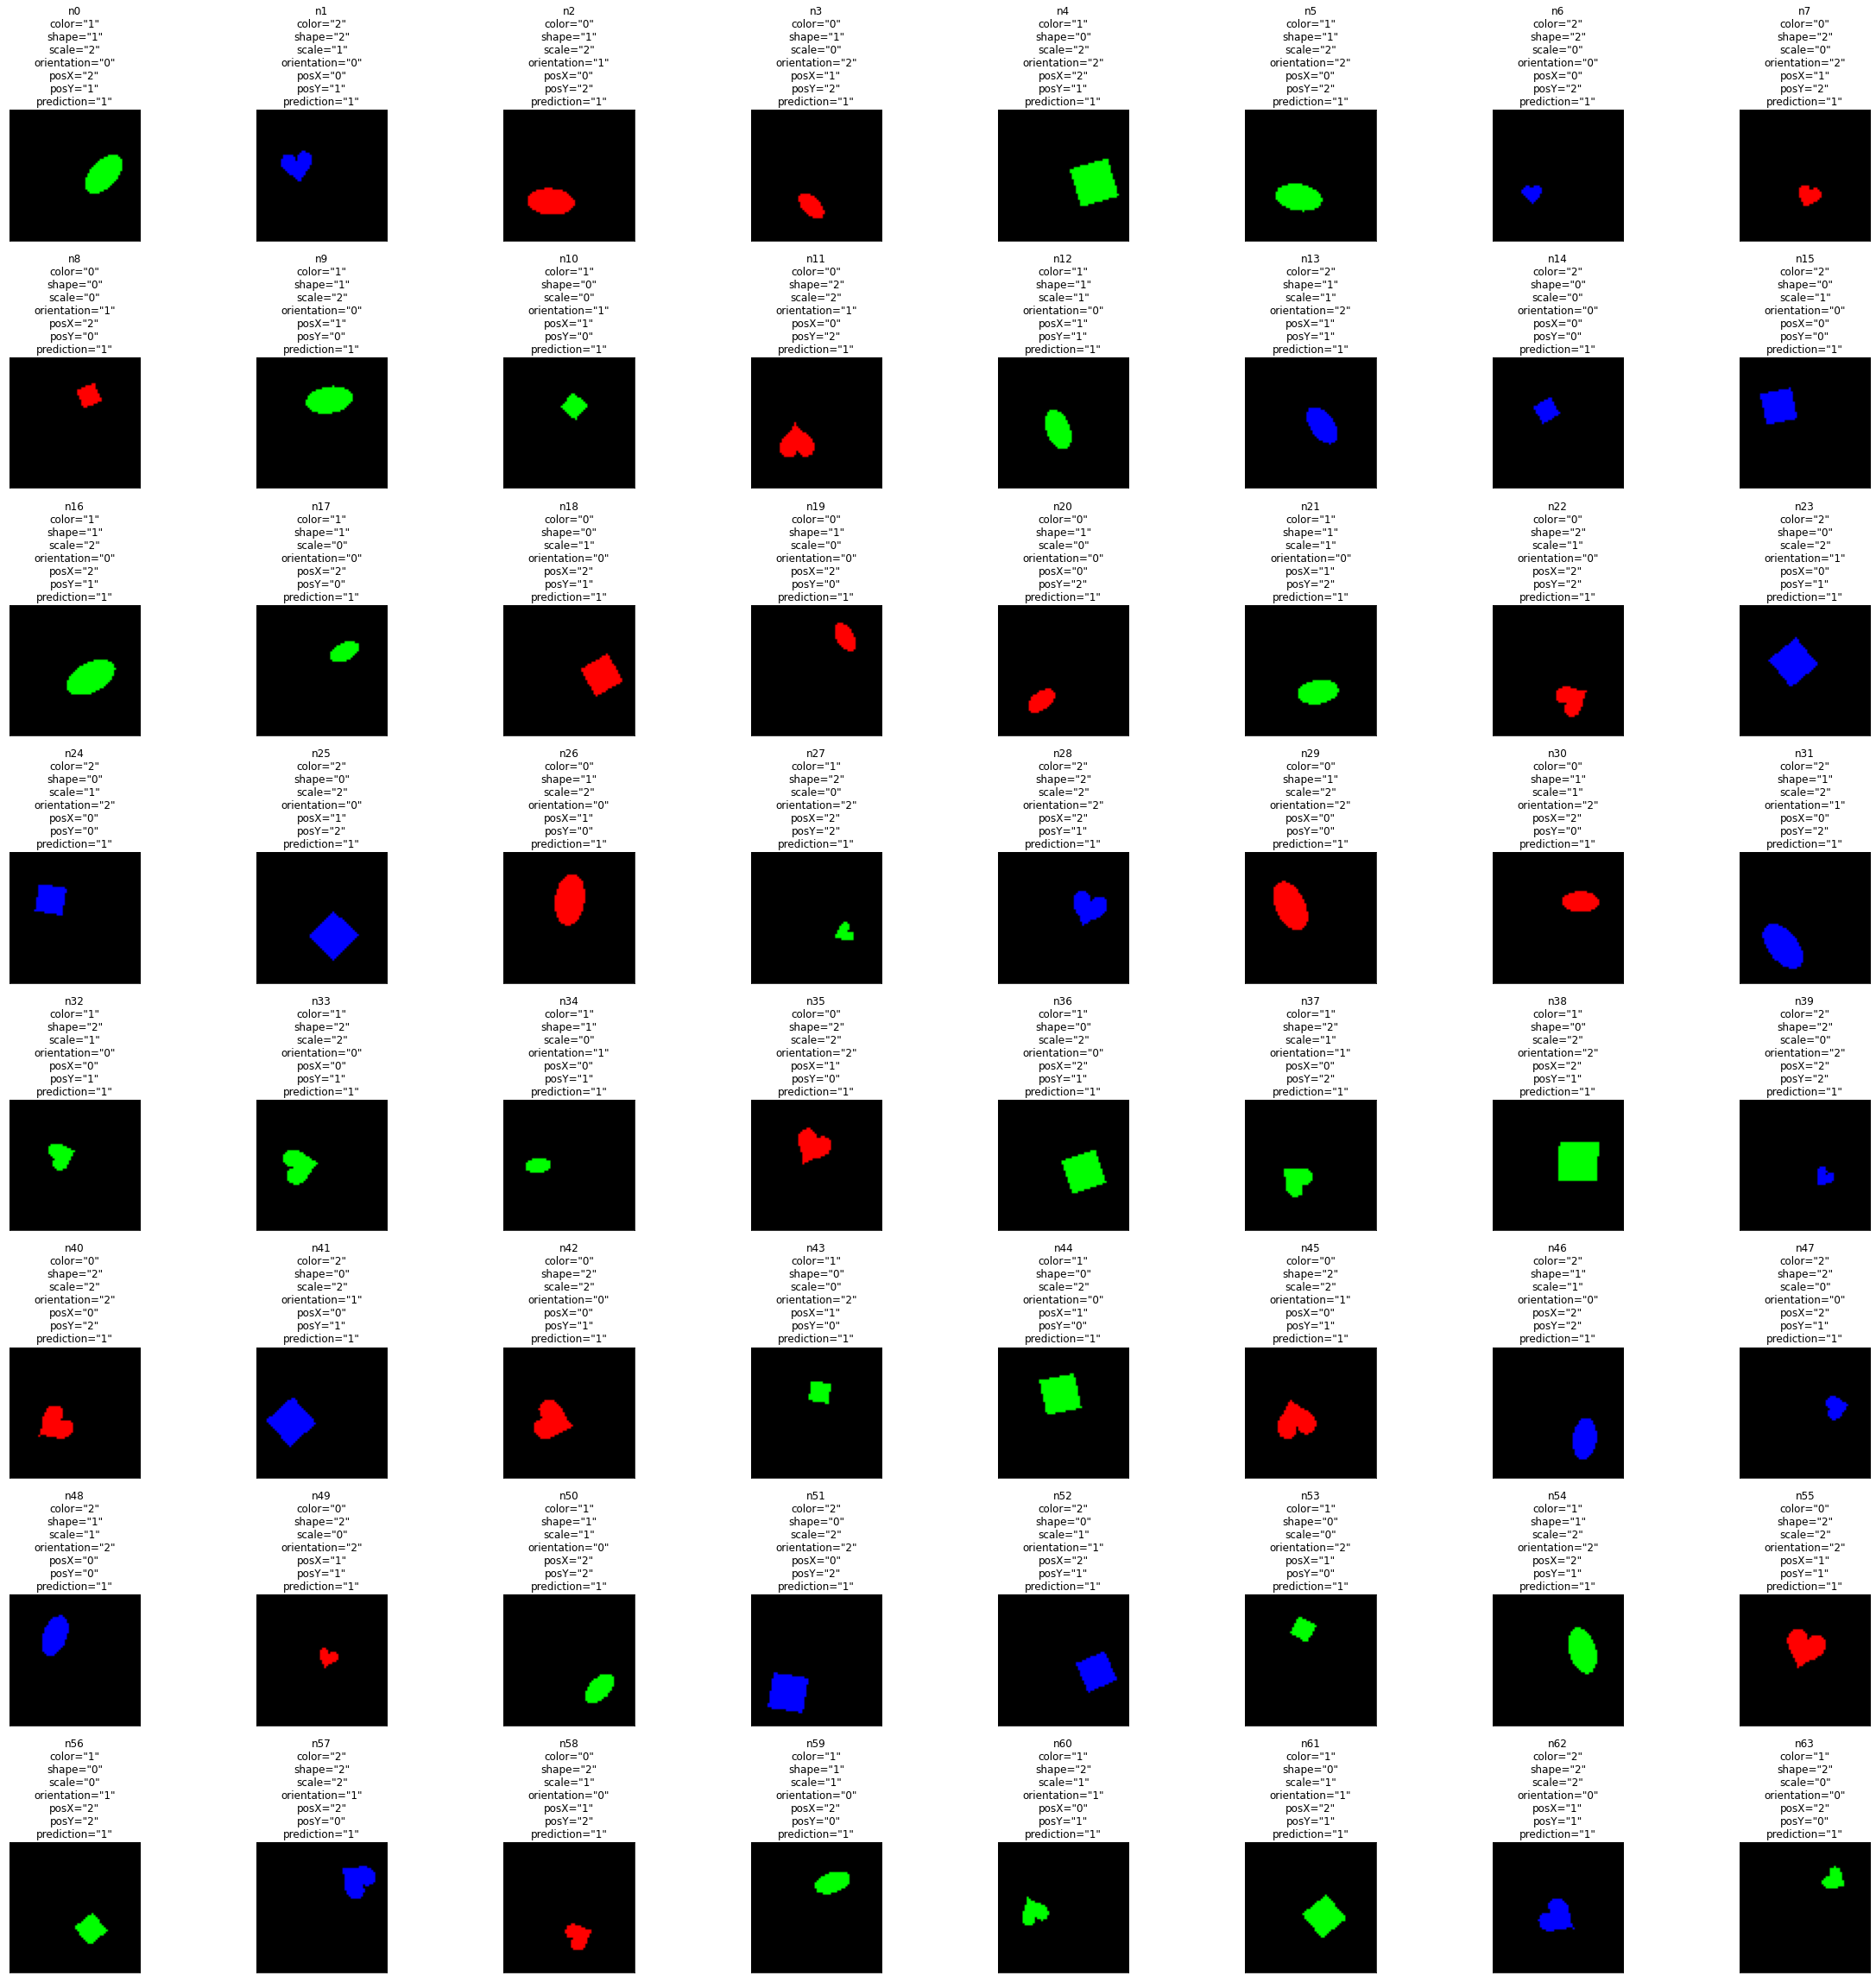

                            
Test on all_cues Accuracy for color: 0.337
Test on all_cues Accuracy for shape: 0.333
Test on all_cues Accuracy for scale: 0.335
Test on all_cues Accuracy for orientation: 0.323
Test on all_cues Accuracy for posX: 0.346
Test on all_cues Accuracy for posY: 0.346


In [ ]:
# Check to which cue which model is trained (maybe random model)

######### ATTENTION PLEASE
train.eval_model_on_test(
    model_A, 
    test_multilabel_dataloaders, 
    make_metric=train.make_accuracy
) 

train.eval_model_on_test(
    model_B, 
    test_multilabel_dataloaders, 
    make_metric=train.make_accuracy
) 
######### THANK YOU FOR YOUR ATTENTION

Model A predicts the shape cue almost perfectly, but also returns random guesses for all of the other cues. Model B did not learn anything at all.

Okay, we understood how to evaluate models, but how to train them? For that we will use function [train.train_eval_loop](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L235-L403).

To train and eval a model we will need to provide train and validation dataloaders accompanied by
the following factories:

- make_model
- make_metrics
- make_criterion
- make_optimizer
- make_scheduler

as well as function "do_train_func" which defines how to update model weights (you can see examples of these functions in the next task).

With these building blocks we can describe any train/eval procedure we need.

### Train a model (3 points)

In [ ]:
one_cue_train_dataloader = datasets.prepare_default_dsprites_dataloaders_maker(
    one_dataloader_to_select=GROUND_TRUTH_CUE
)(None)

model_to_train = models.prepare_resnet18_maker()()

Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Saved cached default_dsprites_dataloaders into /tmp/ood_cache/default_dsprites_dataloaders_939d09271c96f8cf7475.pkl


Train the "model_to_train" on the "one_cue_train_dataloader" and validate on the "test_multilabel_dataloaders" so that it has 90%+ validation accuracy.

Use the following functions from the UT-TML repo:
- [train.train_eval_loop](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L235-L403)
- [train.make_accuracy](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L451-L452)
- [train.make_ce_criterion](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L455-L456)
- [train.prepare_sgd_optimizer_maker](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L459-L468)
- [train.prepare_exp_scheduler_maker](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L490-L495)
- [train.do_default_train_func](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L498-L563)

Epoch 10/10 train mean stats:
    loss: 0.21096269588786573
    Accuracy: 0.911


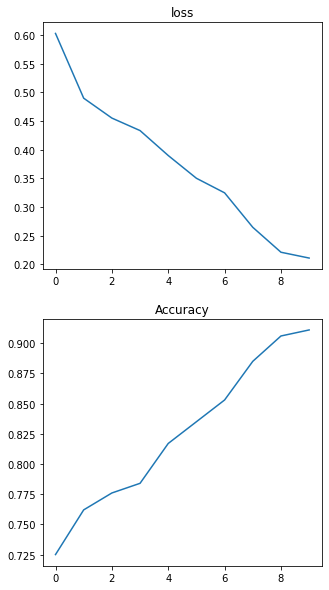

                                    
Epoch 10/10 val all_cues mean stats:
    Accuracy for color: 0.256
    Accuracy for shape: 0.296
    Accuracy for scale: 0.785
    Accuracy for orientation: 0.334
    Accuracy for posX: 0.326
    Accuracy for posY: 0.328


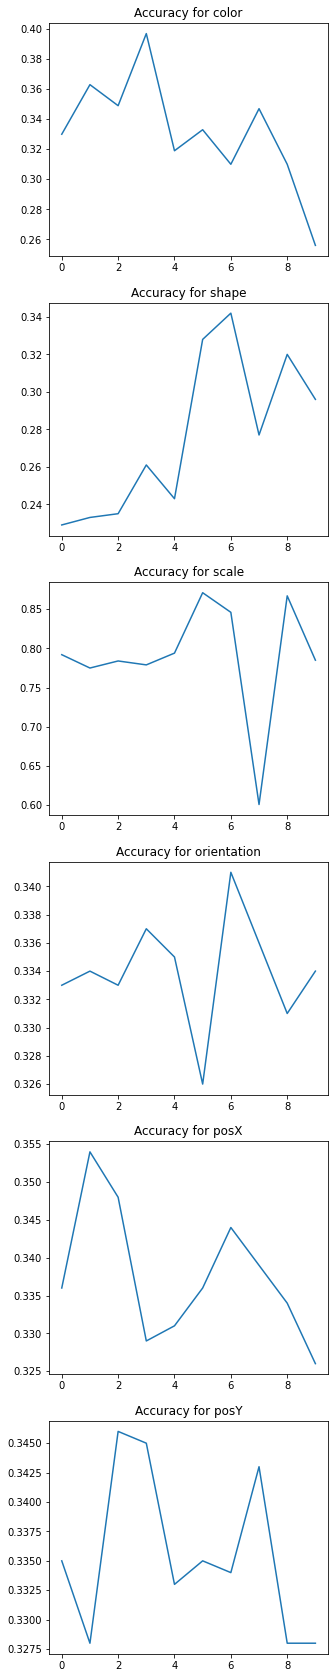

In [ ]:
######### ATTENTION PLEASE
train.train_eval_loop(model_to_train,
                one_cue_train_dataloader,
                test_multilabel_dataloaders,
                10,
                train.make_accuracy,
                train.make_ce_criterion,
                train.prepare_sgd_optimizer_maker(DEFAULT_START_LR),
                train.prepare_exp_scheduler_maker(),
                train.do_default_train_func,
                RANDOM_SEED)
######### THANK YOU FOR YOUR ATTENTION

To avoid calling above function every time, in the next exercises we will use function [experiments.generic_experiment](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/experiments.py#L13-L86). It will train and eval model on train/val dataloaders and then test it on a test dataloader. It will use factories to create all objects.

## 1.5 De-biasing task (10 + 5 + 5 + 10 + 15 [+ 10] = 45 [55] points)

For the de-biasing task we will focus on two cues. One cue will be called "ground_truth_cue" (defined by the "GROUND_TRUTH_CUE") and the second cue will be called "easy_to_bias_cue" (defined by the "EASY_TO_BIAS_CUE"). 

Each sample will be assigned with two labels: "ground_truth_label" according to the "ground_truth_cue" and "easy_to_bias_label" according to the "easy_to_bias_cue".

Let's introduce the concept of diagonal and off-diagonal samples:

![](https://drive.google.com/uc?export=view&id=1tlRWcMEY0TWG4E9eb161GuX3qJvzI4QS "Diagonal and off-diagonal samples.")

As we can see from the image above, when "ground_truth_label" equals "easy_to_bias_label" for some sample, this sample is called diagonal, otherwise it is called off-diagonal.



Most of the samples in the train dataloader will be diagonal in this exercise. 

Our goal is to to train a model which predicts "ground_truth_label" with higher accuracy than "easy_to_bias_label". The main difficulty is that it is not a necessary condition for correctly predicting train labels.

Let's see what happens if we just train a model on a purely diagonal train dataloader (i.e. all samples are diagonal in this dataloader).

For that reason we will use a function "de_biasing_exp" below. It uses [datasets.prepare_de_biasing_task_dataloader_maker](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/datasets.py#L966-L1123) to prepare factories for dataloaders. If you are interested, there is a comment about validation and test datasets for this experiment in the "Note" section of the [report task](https://colab.research.google.com/drive/1rBbUwaaugOOCEt5eOQnSe9q4INdU5SoN#scrollTo=WLqrYkopwUDh&line=16&uniqifier=1) description.

In [ ]:
def de_biasing_exp(
    n_epochs,
    make_train_dataloader=datasets.prepare_de_biasing_task_dataloader_maker(),
    make_val_dataloaders=datasets.prepare_de_biasing_task_dataloader_maker(
        split="test",
        dataset_size=TEST_DATASET_SIZE
    ),
    make_test_dataloaders=datasets.prepare_default_dsprites_dataloaders_maker(
        is_multilabel=True,
        split="test",
        dataset_size=TEST_DATASET_SIZE
    ),
    make_model=models.prepare_resnet18_maker(),
    make_criterion=train.make_ce_criterion,
    make_optimizer=train.prepare_sgd_optimizer_maker(DEFAULT_START_LR),
    make_scheduler=train.prepare_exp_scheduler_maker(),
    make_metric=train.make_accuracy,
    do_train_func=train.do_default_train_func,
    random_seed=RANDOM_SEED,
    stop_after_epoch=None
):

    experiments.generic_experiment(
        n_epochs=n_epochs,
        make_train_dataloader=make_train_dataloader,
        make_val_dataloaders=make_val_dataloaders,
        make_test_dataloaders=make_test_dataloaders,
        make_model=make_model,
        make_metric=make_metric,
        make_criterion=make_criterion, 
        make_optimizer=make_optimizer,
        make_scheduler=make_scheduler,
        do_train_func=do_train_func,
        random_seed=random_seed,
        stop_after_epoch=stop_after_epoch
    )
    

Let's run default de-biasing exp:

Epoch 10/10 train mean stats:
    loss: 2.5305258039649248e-05
    Accuracy: 1.0


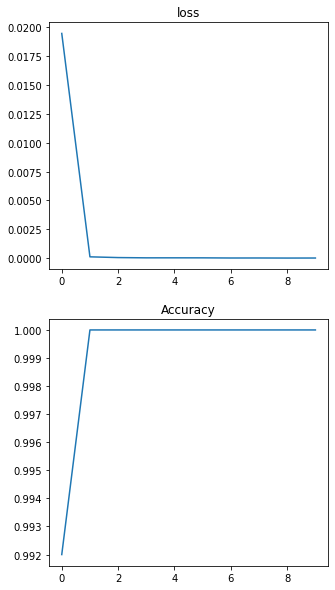

                                
Epoch 10/10 val diag mean stats:
    Accuracy: 1.0


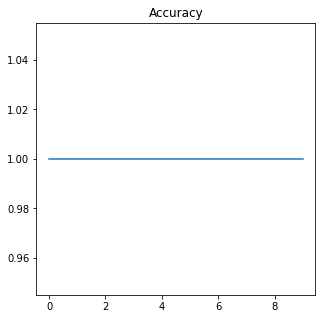

                                 
Epoch 10/10 val scale mean stats:
    Accuracy: 0.358


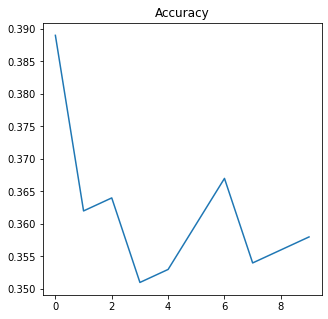

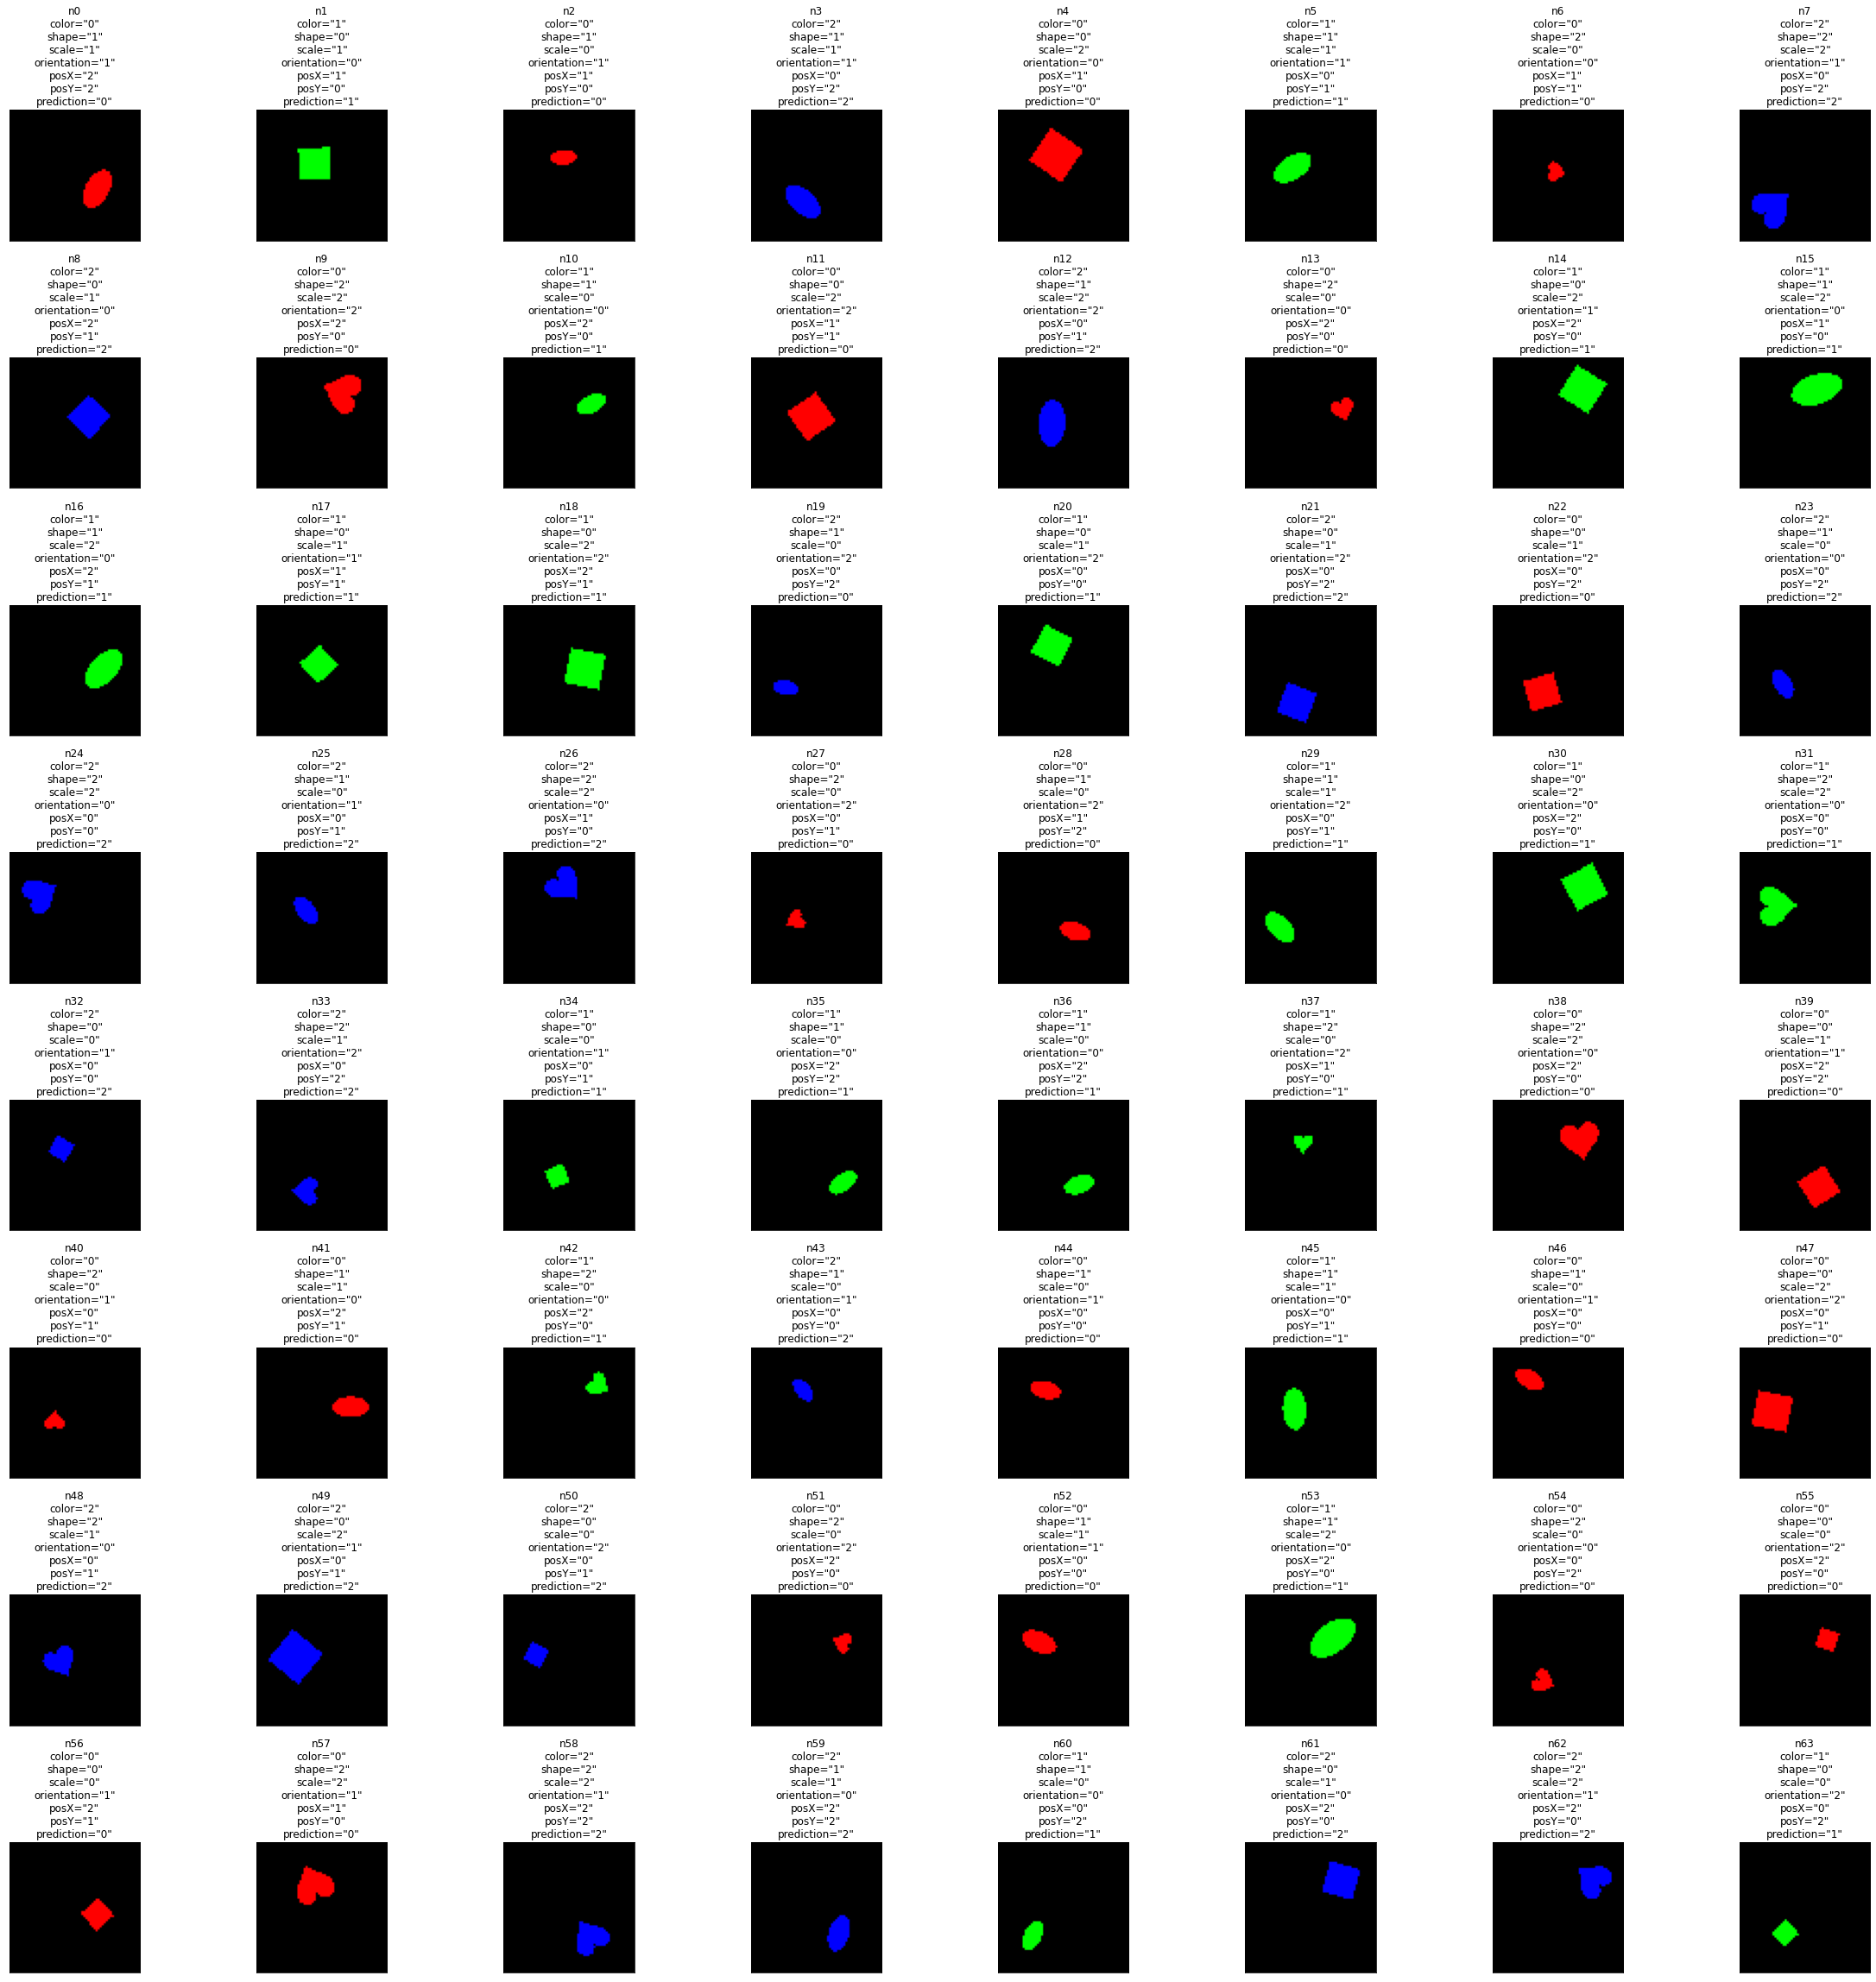

                            
Test on all_cues Accuracy for color: 0.983
Test on all_cues Accuracy for shape: 0.318
Test on all_cues Accuracy for scale: 0.349
Test on all_cues Accuracy for orientation: 0.331
Test on all_cues Accuracy for posX: 0.334
Test on all_cues Accuracy for posY: 0.334


In [ ]:
de_biasing_exp(n_epochs=10)

As we can see the model trained during this experiment is indeed biased to the "easy_to_bias_cue". Let's add some off-diagonal samples to the train dataloader:

Epoch 10/10 train mean stats:
    loss: 0.004293111654220911
    Accuracy: 0.999


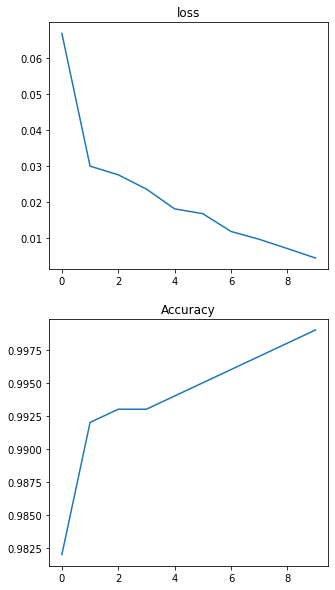

                                
Epoch 10/10 val diag mean stats:
    Accuracy: 0.999


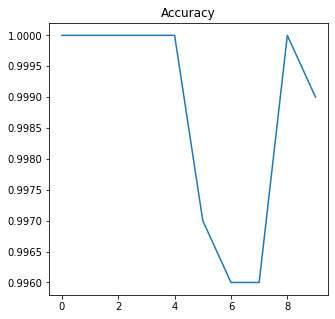

                                 
Epoch 10/10 val scale mean stats:
    Accuracy: 0.499


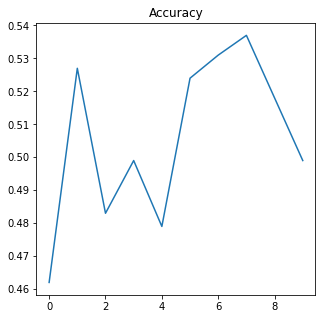

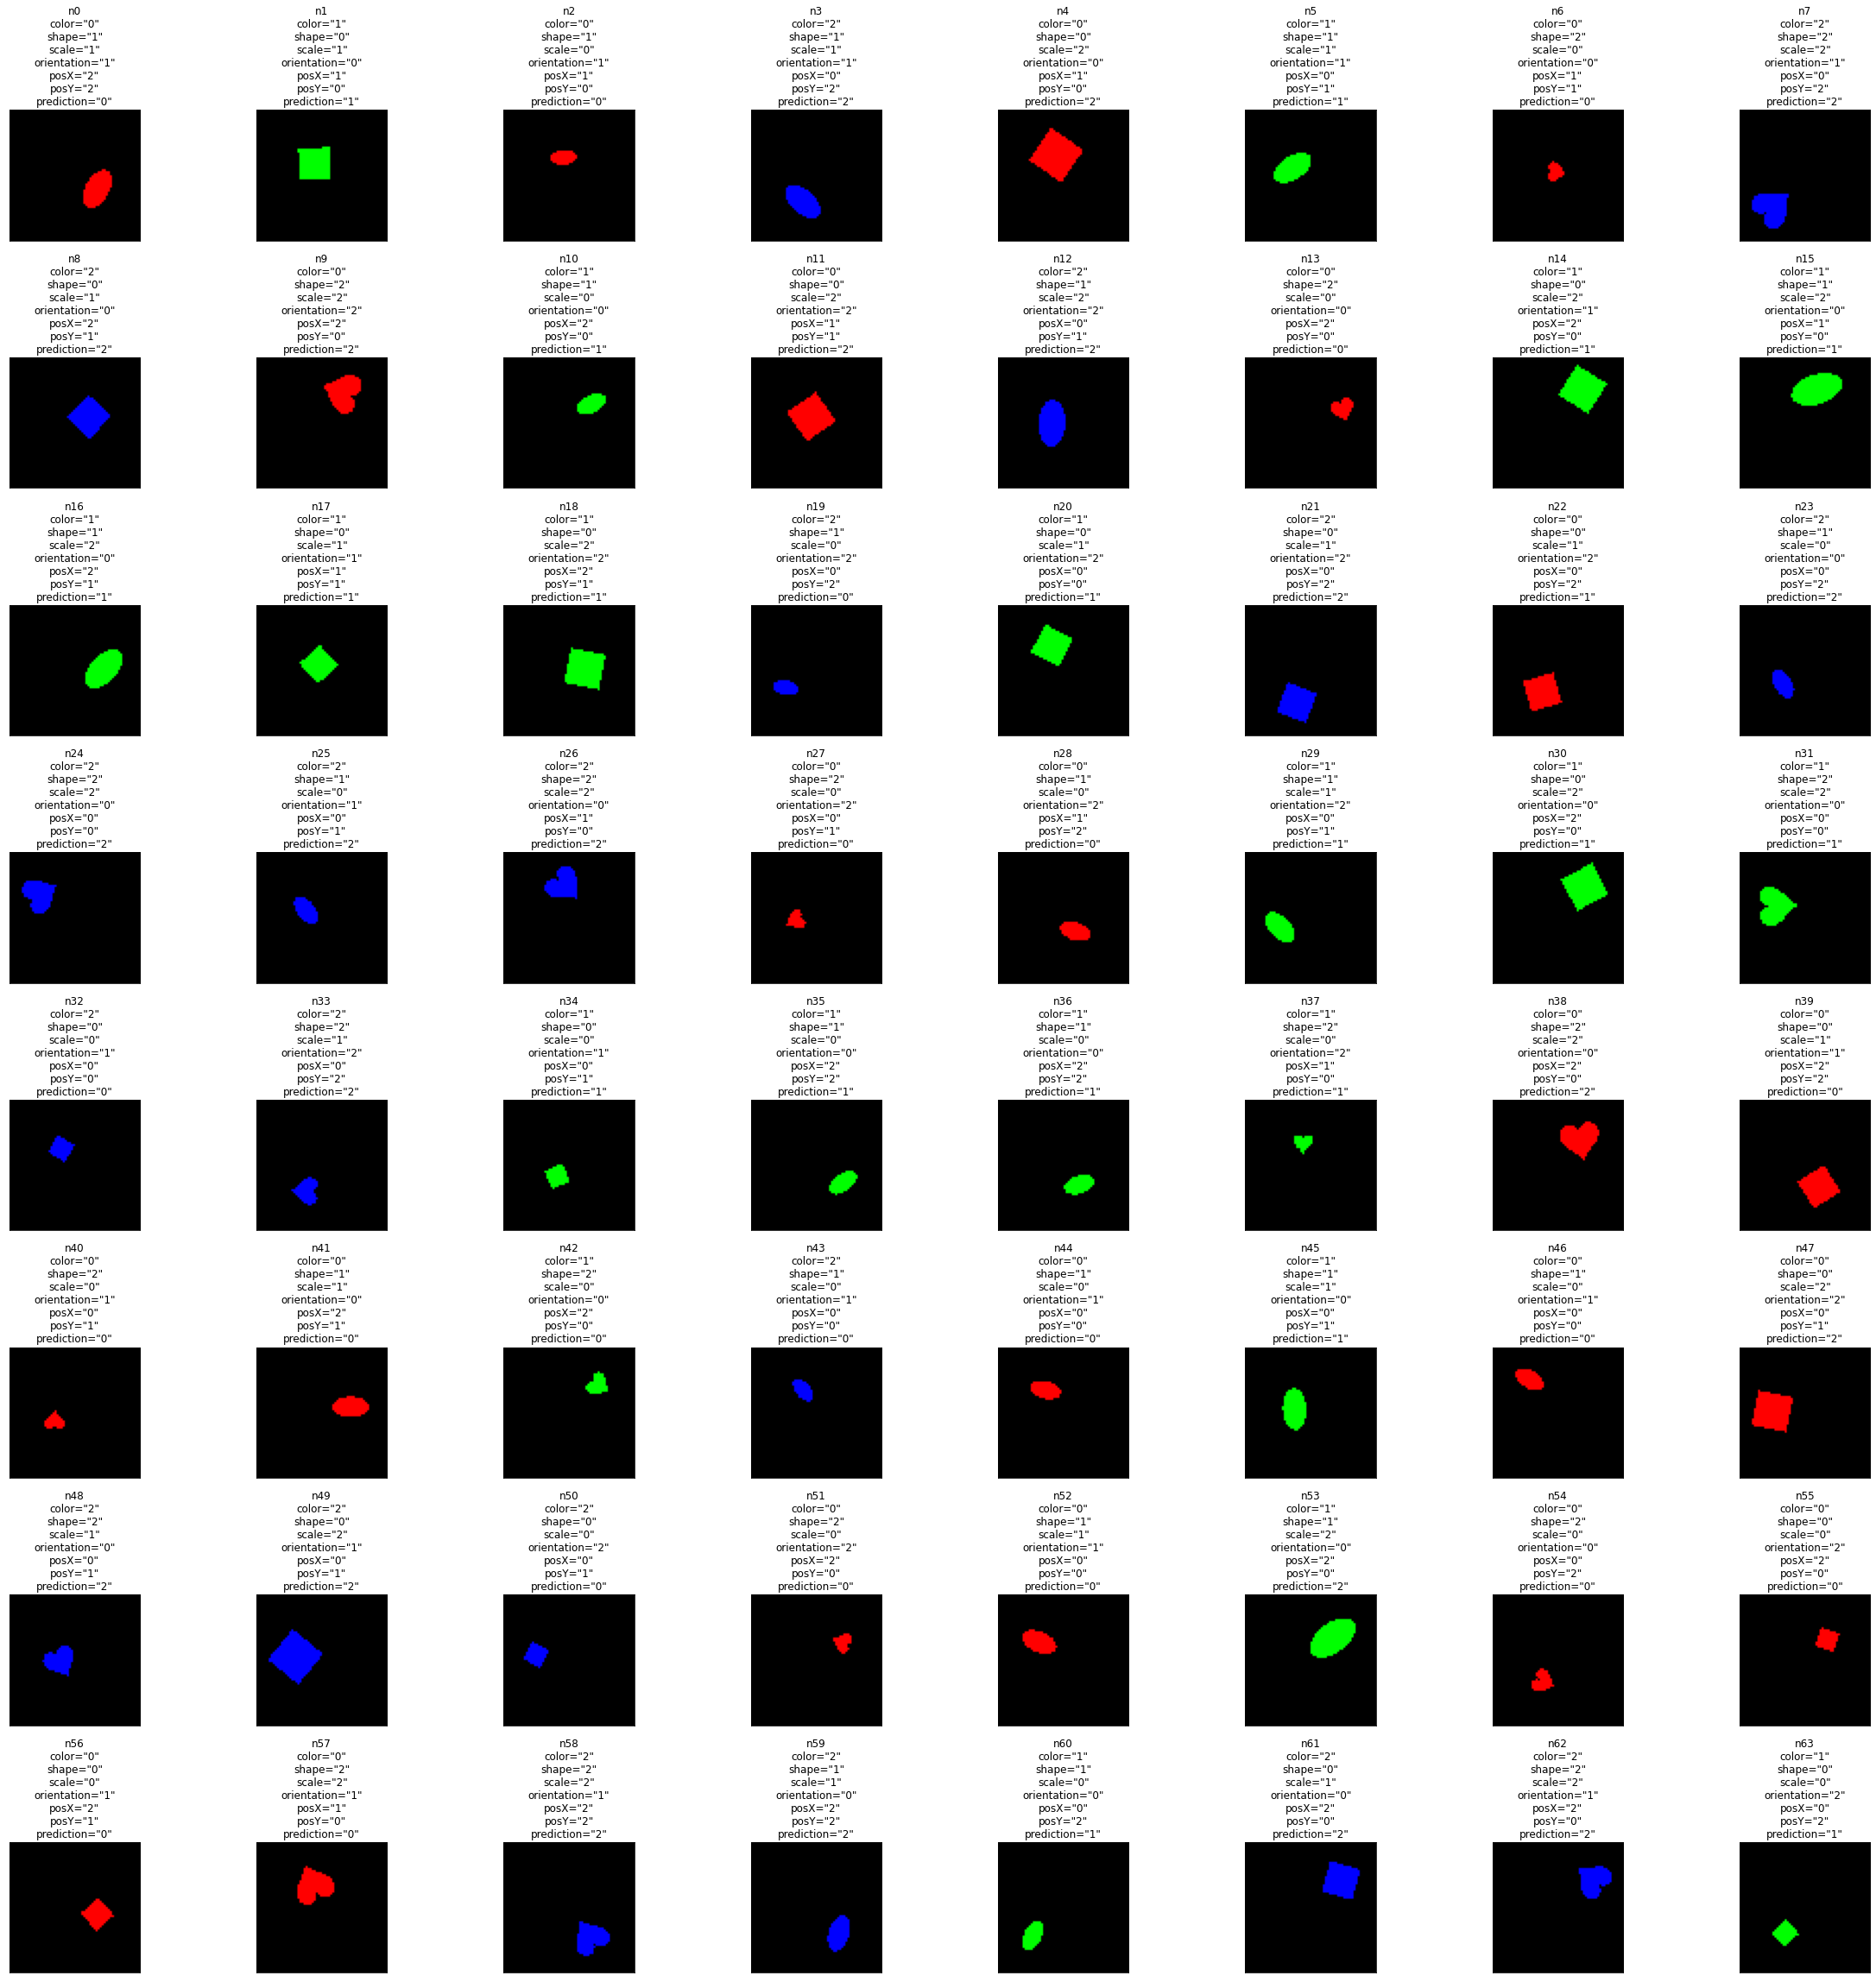

                            
Test on all_cues Accuracy for color: 0.805
Test on all_cues Accuracy for shape: 0.27
Test on all_cues Accuracy for scale: 0.492
Test on all_cues Accuracy for orientation: 0.326
Test on all_cues Accuracy for posX: 0.321
Test on all_cues Accuracy for posY: 0.331


In [ ]:
de_biasing_exp(
    make_train_dataloader=datasets.prepare_de_biasing_task_dataloader_maker(
        off_diag_proportion=OFF_DIAG_PROPORTION
    ),
    n_epochs=10
)

New model is less biased to the "easy_to_bias_cue" but is still far from predicting the "ground_truth_cue" correctly. 

What about using a custom loss that treats diagonal and off-diagonal samples differently?

### Apply diagonal and off-diagonal weights in "WeightedCrossEntropy" loss. (10 points)

In [ ]:
class WeightedCrossEntropy:
    """
    Class for the modification of the cross entropy loss 
    which has different weights for diagonal and off-diagonal loss elements.

    Where i-th loss element is L(x_i, y_i),
    when (x_i, y_i) is the i-th sample, 
    i.e. x_i and y_i are i-th input and ground truth label correspondingly,
    and L(x, y) -> R is some loss function.

    Loss element is called diagonal (off-diagonal) 
        if it is computed for the diagonal (off-diagonal) sample.
    """

    def __init__(
        self, 
        off_diag_weight: float, 
        diag_weight: float
    ):
        """
        Initialize WeightedCrossEntropy.

        Args:
            off_diag_weight (float): a weight given to the off-diagonal 
                loss elements. 
                Stored in "self.off_diag_weight".

            diag_weight (float): a weight given to the diagonal loss elements.
                Stored in "self.diag_weight".
        """

        self.off_diag_weight = off_diag_weight
        self.diag_weight = diag_weight
        self.ce = torch.nn.CrossEntropyLoss(reduction="none") 
        self.use_second_labels = True

    def apply_weights(
        self, 
        unreduced_loss: torch.tensor, 
        ground_truth_labels: torch.tensor, 
        easy_to_bias_labels: torch.tensor
    ) -> torch.tensor:
        """
        Apply "self.off_diag_weight" to the off-diagonal loss elements 
        and "self.diag_weight" to the diagonal loss elements. 
        Then compute mean value of all loss elements. 

        Args:

            unreduced_loss (torch.tensor): 
                a sequence of loss elements for each sample in a batch, 
                i.e. [L(x_i, y_i)]_i.

            ground_truth_labels (torch.tensor):
                a sequence of ground truth labels, i.e. [y_i]_i.

            easy_to_bias_labels (torch.tensor):
                a sequence of labels assigned 
                according to the "easy to bias" cue.

        Returns: 
            loss (torch.tensor): mean value of loss elements 
                after applying corresponding weights to the diagonal 
                and off-diagonal loss elements.
        """

        ######### ATTENTION PLEASE
        weights = torch.ones_like(unreduced_loss) * self.off_diag_weight
        weights[easy_to_bias_labels == ground_truth_labels] = self.diag_weight
        weighted_loss = weights * unreduced_loss
        return weighted_loss.mean(-1)
        ######### THANK YOU FOR YOUR ATTENTION

    def __call__(self, pred, ground_truth_labels, easy_to_bias_labels):

        unreduced_loss = self.ce(pred, ground_truth_labels)
        
        return self.apply_weights(
            unreduced_loss, 
            ground_truth_labels, 
            easy_to_bias_labels
        )


def prepare_weighted_ce_maker(off_diag_weight, diag_weight):
    
    def make_weighted_ce():
        return WeightedCrossEntropy(off_diag_weight, diag_weight)

    return make_weighted_ce

Now we will run an experiment with a weighted loss that uses "INVERTED_OFF_DIAG_PROPORTION" as a weight for the off-diag samples (we use an ADAM optimizer here, its factory function is made by function [train.prepare_adam_optimizer_maker](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L471-L487)):

Epoch 20/20 train mean stats:
    loss: 0.2644948836939689
    Accuracy: 0.951


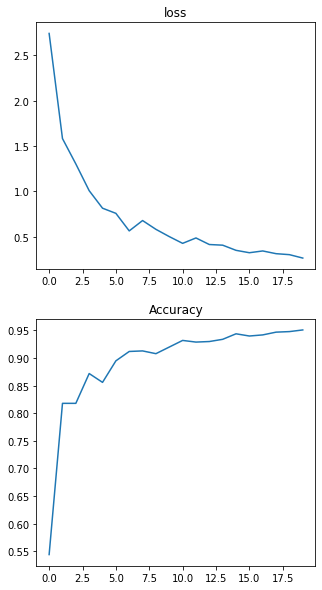

                                
Epoch 20/20 val diag mean stats:
    Accuracy: 0.938


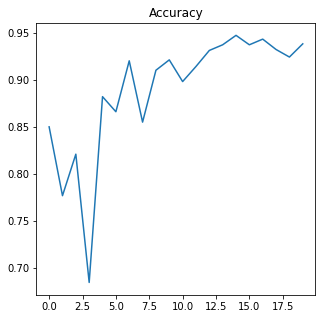

                                 
Epoch 20/20 val scale mean stats:
    Accuracy: 0.61


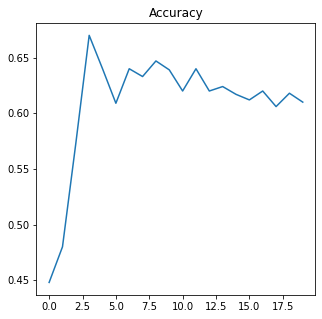

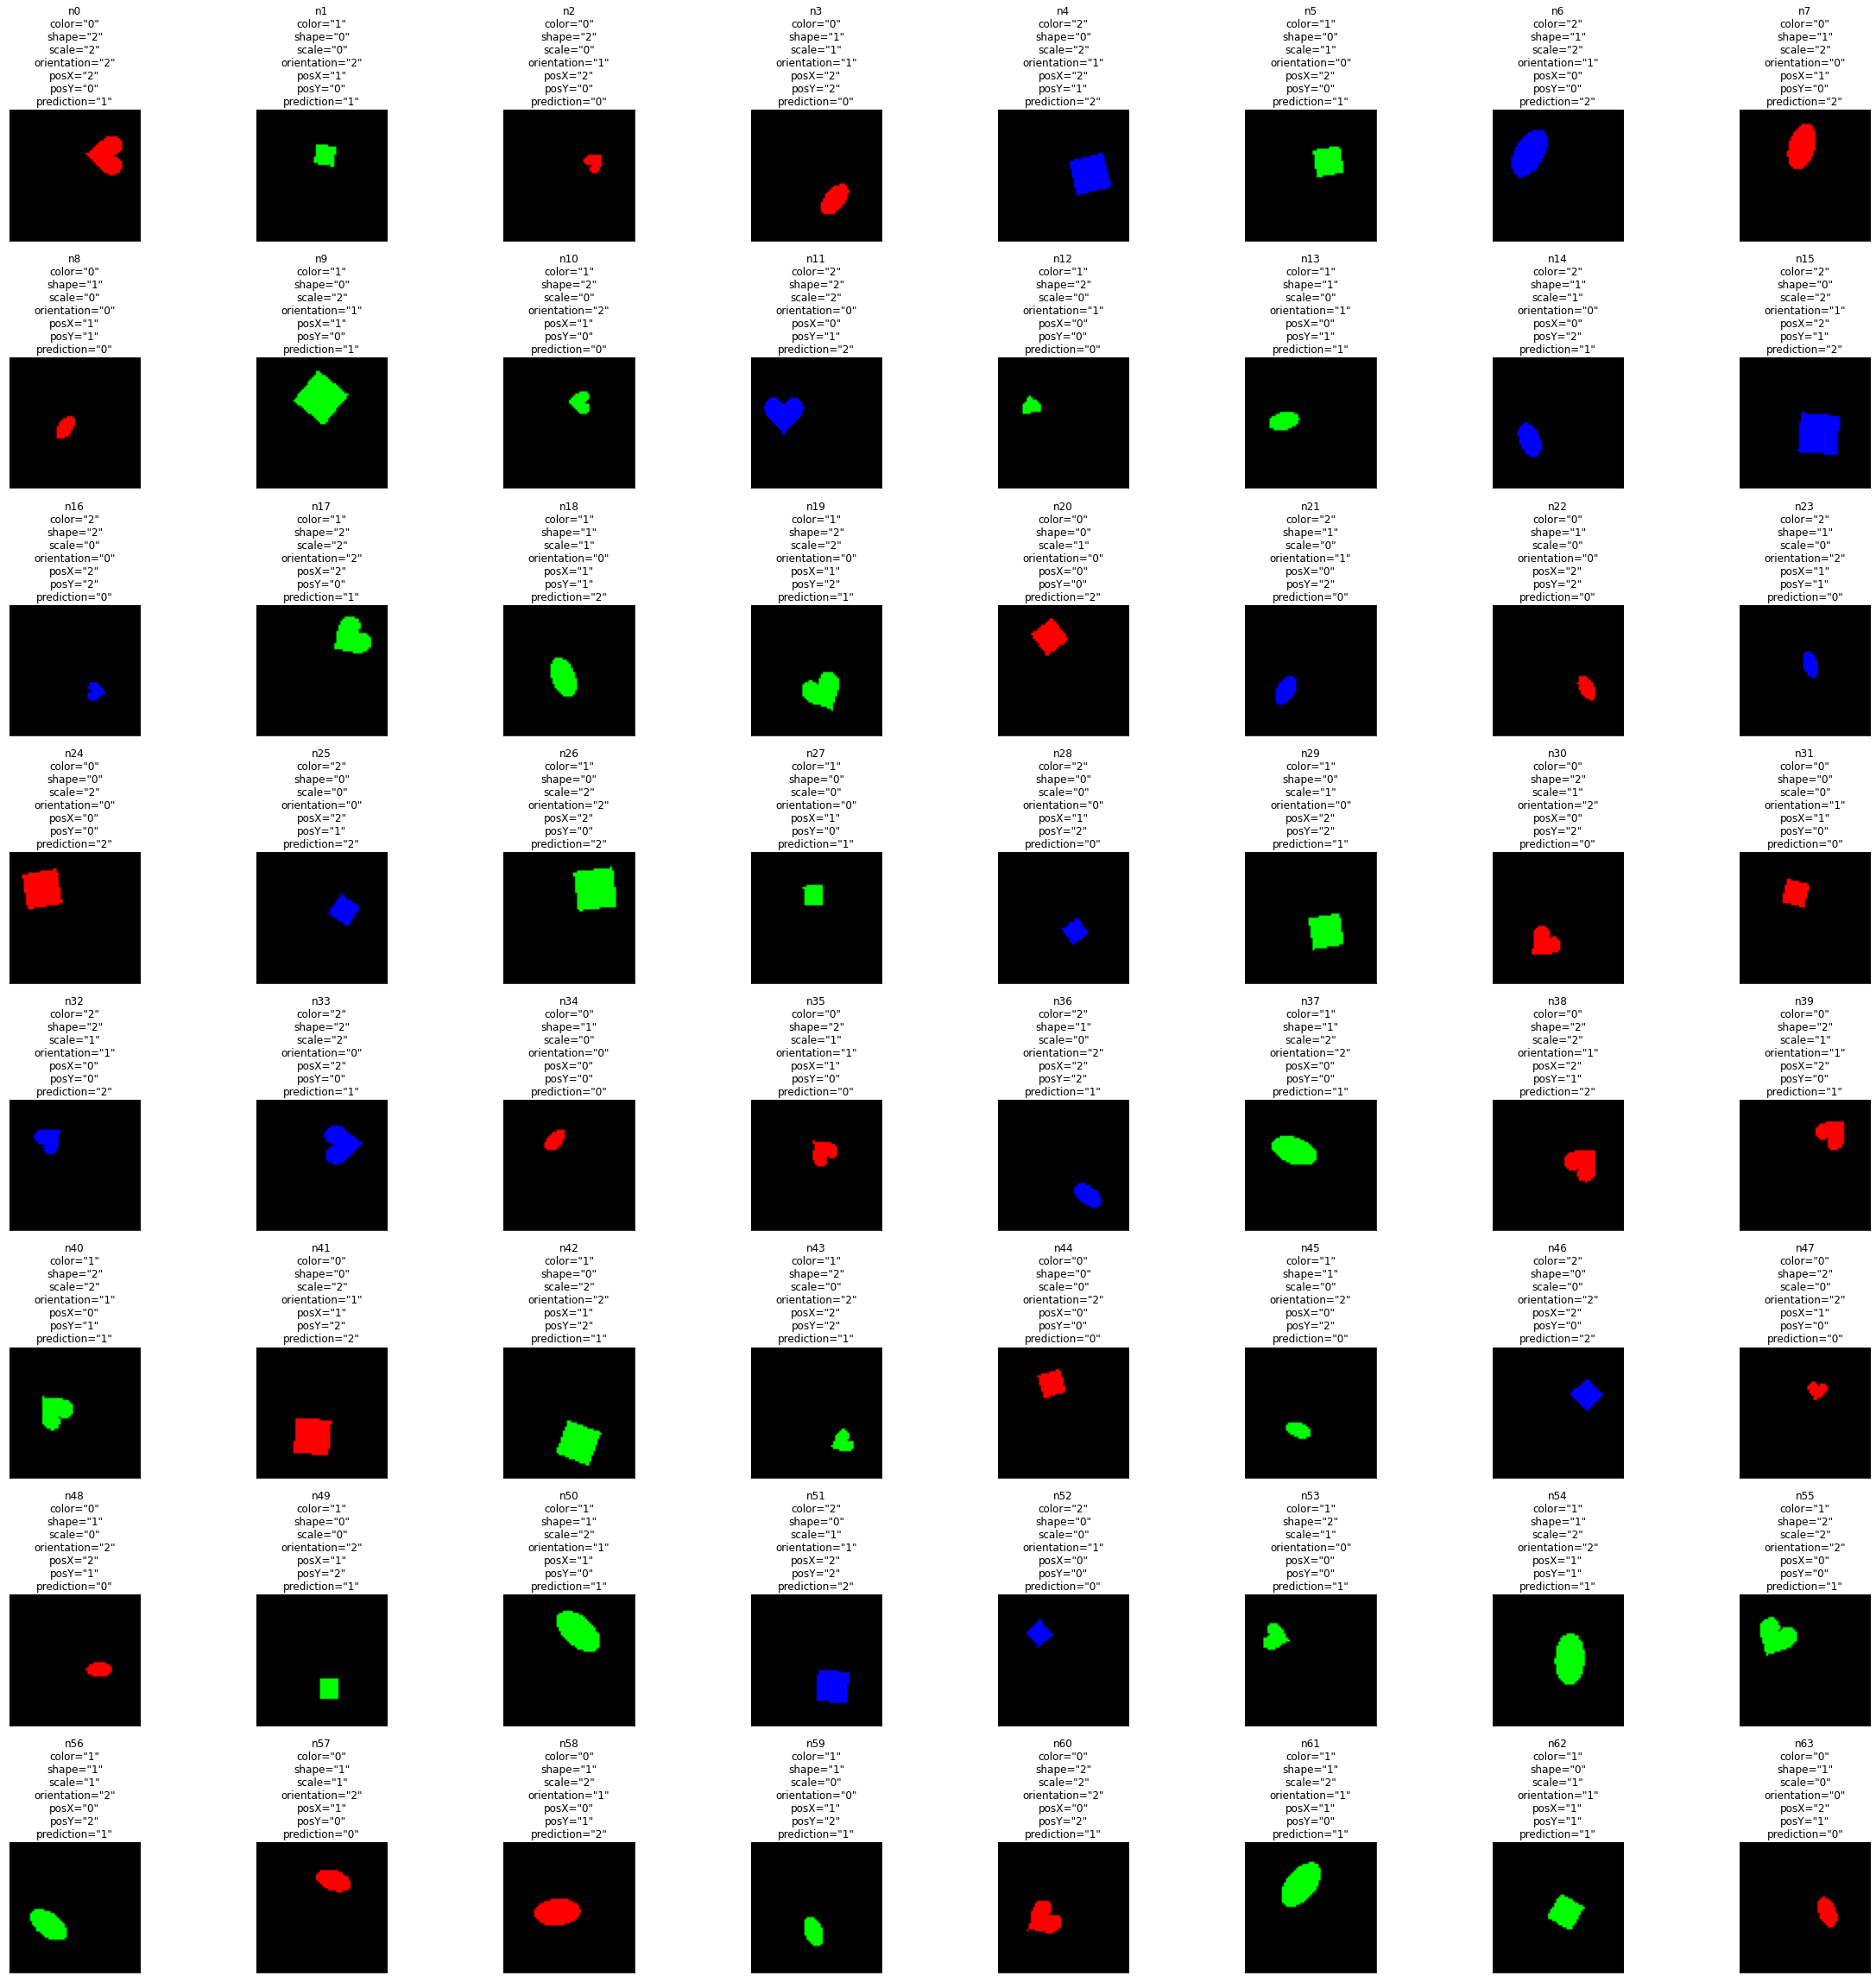

                            
Test on all_cues Accuracy for color: 0.6
Test on all_cues Accuracy for shape: 0.253
Test on all_cues Accuracy for scale: 0.61
Test on all_cues Accuracy for orientation: 0.327
Test on all_cues Accuracy for posX: 0.327
Test on all_cues Accuracy for posY: 0.348


In [ ]:
de_biasing_exp(
    n_epochs=20,
    make_train_dataloader=datasets.prepare_de_biasing_task_dataloader_maker(
        off_diag_proportion=OFF_DIAG_PROPORTION
    ),
    make_criterion=prepare_weighted_ce_maker(INVERTED_OFF_DIAG_PROPORTION, 1),
    make_optimizer=train.prepare_adam_optimizer_maker(0.01)
)

Modifying loss is quite an useful approach, but it sounds not sophisticated enough. Why don't we try Domain-Adversarial Training of Neural Networks (DANN) method inspired by [this paper](https://arxiv.org/abs/1505.07818)?

To implement this approach we will use the "ResNetWrapperForDANN":

In [ ]:
class ResNetWrapperForDANN:
    """
    A wrapper for ResNet18 model to prepare it for the DANN method.
    It has a feature extractor "self.Gf", 
    a "ground_truth" label predictor head "self.Gy"
    and an "easy_to_bias" label predictor head "self.Gd" 
    (a substitution for the domain predictor from the DANN paper, 
    that is why "d").
    """

    def __init__(self, resnet_model):

        self.Gf = torch.nn.Sequential(
            resnet_model.conv1, 
            resnet_model.bn1, 
            resnet_model.relu,
            resnet_model.maxpool,
            resnet_model.layer1,
            resnet_model.layer2,
            resnet_model.layer3, 
            resnet_model.layer4,
            resnet_model.avgpool
        )

        in_features = resnet_model.fc.in_features
        out_features = resnet_model.fc.out_features

        self.Gy = torch.nn.Linear(in_features, out_features)
        self.Gd = torch.nn.Linear(in_features, out_features)

        self.is_train = True

    def __call__(self, input):

        features = self.Gf(input)
        features = features.transpose(3, 1) 

        Gy_output = self.Gy(features).squeeze()

        if self.is_train:
            return Gy_output, self.Gd(features).squeeze()
        else:
            return Gy_output

    def train(self):
        self.is_train = True
        self.Gf.train()
        self.Gy.train()
        self.Gd.train() 

    def eval(self):
        self.is_train = False
        self.Gf.eval()
        self.Gy.eval()
        self.Gd.eval() 

    def to(self, device):
        self.Gf.to(device)
        self.Gy.to(device)
        self.Gd.to(device)


def make_resnet_18_for_DANN():
    return ResNetWrapperForDANN(models.prepare_resnet18_maker()())

The idea of this approach is to simultaneously update weights of feature extractor "Gf" to both decrease loss (increase accuracy) for "ground_truth_cue" head "Gy" and increase loss (decrease accuracy) for "easy_to_bias_cue" head "Gd". 

In an ideal case after this adversarial training, "Gf" will extract such features that will be informative for distinguishing "ground_truth_cue" and totally non-informative for distinguishing "easy_to_bias_cue".

For this increase-decrease (adversarial) task we will use a pair of optimizers. One will be using gradients of loss for Gy predictions, another will be using gradients of loss for Gd predictions. 

### Choose which parameters which optimizer should update (5 points):

In [ ]:
class OptimizerForDANN:
    """
    An optimizer for the DANN method. Contains two sub-optimizers: 
    
      - self.Gy_loss_optimizer for both Gy_loss 
        and inverted (multiplied by -1) Gd_loss.

      - self.Gd_loss_optimizer for only Gd_loss. 

    Even though self.Gy_loss_optimizer optimizes Gy_loss and inverted Gd_loss,
    for name simplicity reasons it does not contain Gd_loss in its name
    (losses are explained in "CriterionForDann").
    """

    def __init__(
        self, 
        model, 
        optimizer_constructor,
        lr,
        **optimizer_kwargs
    ):

        assert isinstance(model, ResNetWrapperForDANN)

        featurizer_params = list(
            filter(lambda p: p.requires_grad, model.Gf.parameters())
        )
        Gy_predictor_params = list(
            filter(lambda p: p.requires_grad, model.Gy.parameters())
        )
        Gd_predictor_params = list(
            filter(lambda p: p.requires_grad, model.Gd.parameters())
        )

        self.Gy_loss_optimizer_params, self.Gd_loss_optimizer_params \
            = self.assign_params_to_optimizers(
                featurizer_params, 
                Gy_predictor_params, 
                Gd_predictor_params
            )
        
        self.start_lr = lr
        self.Gy_loss_optimizer = optimizer_constructor(
            self.Gy_loss_optimizer_params,
            lr=lr,
            **optimizer_kwargs
        ) 
        self.Gd_loss_optimizer = optimizer_constructor(
            self.Gd_loss_optimizer_params,  
            lr=lr,
            **optimizer_kwargs
        )

    def assign_params_to_optimizers(
        self, 
        featurizer_params: List[torch.tensor], 
        Gy_predictor_params: List[torch.tensor], 
        Gd_predictor_params: List[torch.tensor]
    ) -> Tuple[List[torch.tensor], List[torch.tensor]]:
        """
        Choose which params of "ResNetWrapperForDANN" model
        each optimizer should optimize.
        
        Args:
            featurizer_params (List[torch.tensor]): 
                params of the featurizer (model.Gf).

            Gy_predictor_params (List[torch.tensor]): 
                params of the ground truth label predictor head (model.Gy).

            Gd_predictor_params (List[torch.tensor]): 
                params of the easy to bias label predictor head (model.Gd).

        Returns:
        
            Gy_loss_optimizer_params (List[torch.tensor]): params 
                for the self.Gy_loss_optimizer suboptimizer.

            Gd_loss_optimizer_params (List[torch.tensor]): params 
                for the self.Gd_loss_optimizer suboptimizer.
        """

        ######### ATTENTION PLEASE
        Gy_loss_optimizer_params = featurizer_params + Gy_predictor_params
        Gd_loss_optimizer_params = Gd_predictor_params
        ######### THANK YOU FOR YOUR ATTENTION
        
        return Gy_loss_optimizer_params, Gd_loss_optimizer_params

    def zero_grad(self):
        self.Gy_loss_optimizer.zero_grad()
        self.Gd_loss_optimizer.zero_grad()


def prepare_optimizer_for_DANN_maker(
    optimizer_constructor=optim.SGD,
    lr=DEFAULT_START_LR,
    **optimizer_kwargs
):

    def make_optimizer_for_DANN(model):
        return OptimizerForDANN(
            model, 
            optimizer_constructor,
            lr,
            **optimizer_kwargs
        )

    return make_optimizer_for_DANN


# scheduler similar to the one in the paper
class SchedulerForDANN:

    def __init__(self, optimizer, alpha=ALPHA, beta=BETA):
        assert isinstance(optimizer, OptimizerForDANN)
        self.optimizer = optimizer
        self.start_lr = self.optimizer.start_lr
        self.alpha = alpha 
        self.beta = beta 
        self.training_progress = 0
        self.step()

    def step(self):
        denominator = (1 + self.alpha * self.training_progress) ** self.beta
        current_lr = self.start_lr / denominator
        self.optimizer.Gd_loss_optimizer.param_groups[0]['lr'] = current_lr
        self.optimizer.Gy_loss_optimizer.param_groups[0]['lr'] = current_lr
        
        
def prepare_scheduler_for_DANN_maker(alpha, beta):

    def make_scheduler_for_DANN(optimizer):
        return SchedulerForDANN(optimizer, alpha, beta)

    return make_scheduler_for_DANN

### How to compute "Gy_loss" and "Gd_loss" for the DANN criterion? (5 points)

In [ ]:
class CriterionForDANN:
    """
    Compute loss for predictions of "model.Gy" 
    and "ground truth labels" (Gy_loss) 
    as well as loss for predictions of "model.Gd"
    and "easy to bias labels" (Gd_loss).
    Where model is of type "ResNetWrapperForDANN".

    "self.f_lambda" is a weight with which negative Gd_loss is used 
    to compute gradients for "model.Gf".

    "self.d_lambda" is a weight with which Gd_loss is used 
    to compute gradients for "model.Gd".
    """
    
    def __init__(self, Gd_loss_weight, gamma):
        self.ce = train.make_ce_criterion()
        self.f_lambda = 0
        self.d_lambda = Gd_loss_weight 
        self._training_progress = 0
        self.gamma = gamma
        self.use_second_labels = True

    @property
    def training_progress(self):
        return self._training_progress

    @training_progress.setter
    def training_progress(self, new_value):
        self._training_progress = new_value
        self._update_f_lambda()

    # update for loss weights similar to the one in the paper
    def _update_f_lambda(self):
        assert self.training_progress >= 0
        assert self.training_progress <= 1
        self.f_lambda = (
            2 * torch.sigmoid(
                torch.Tensor([self.gamma * self.training_progress])
            ).item() - 1
        )

    def __call__(self, pred, ground_truth_labels, easy_to_bias_labels):

        def compute_losses(
            compute_loss: Callable,
            Gy_pred: torch.tensor, 
            Gd_pred: torch.tensor, 
            ground_truth_labels: torch.tensor, 
            easy_to_bias_labels: torch.tensor
        ) -> Tuple[torch.tensor, torch.tensor]:
            """
            Compute Gy_loss and Gd_loss.

            Args:

                compute_loss (Callable): function used to compute loss 
                    for predictions and labels.

                Gy_pred (torch.tensor): predictions by model.Gy.

                Gd_pred (torch.tensor): predictions by model.Gd.

                ground_truth_labels (torch.tensor): cameo.

                easy_to_bias_labels (torch.tensor): cameo.

            Returns:

                Gy_loss (torch.tensor): cameo.

                Gd_loss (torch.tensor): cameo.
            """
            ######### ATTENTION PLEASE
            Gy_loss = compute_loss(Gy_pred, ground_truth_labels)
            Gd_loss = compute_loss(Gd_pred, easy_to_bias_labels)
            ######### THANK YOU FOR YOUR ATTENTION
            
            return Gy_loss, Gd_loss

        assert len(pred) == 2, \
            "Expect target predictor output and domain predictor output" 

        Gy_pred, Gd_pred = pred

        Gy_loss, Gd_loss = compute_losses(
            self.ce,
            Gy_pred, 
            Gd_pred, 
            ground_truth_labels, 
            easy_to_bias_labels
        )

        return Gy_loss, Gd_loss, self.f_lambda, self.d_lambda


def prepare_criterion_for_DANN_maker(Gd_loss_weight=D_LAMBDA, gamma=GAMMA):

    def make_criterion_for_DANN():
        return CriterionForDANN(Gd_loss_weight, gamma)

    return make_criterion_for_DANN

### How to properly update weights of the model in "do_dann_train_func"? (10 points)

In [ ]:
def do_dann_train_func(
    model: torch.nn.Module,
    criterion: Callable,
    optimizer: object,
    images_batch: torch.tensor,
    labels_batch: torch.tensor,
    second_labels_batch: torch.tensor,
    epoch_histories: Dict[str, List[float]]
) -> Tuple[torch.tensor, Dict[str, List[float]]]:
    """
    <do_train_func> for UT-TML repo function "train.run_epoch" 
        in a DANN scenario.

    Args and Returns:

        same as for UT-TML repo function "train.do_default_train".
    """

    def do_optimizer_steps(
        optimizer: OptimizerForDANN, 
        total_loss: torch.tensor, 
        weighted_Gd_loss: torch.tensor
    ) -> None:
        """
        Perform steps by the "OptimizerForDann"'s suboptimizers. 
        One optimizes <total_loss> another optimizes <weighted_Gd_loss>.
        Where <total_loss> and <weighted_Gd_loss> have been computed using 
        Gy_loss and Gd_loss returned by the "CriterionForDANN".

        Args:
            optimizer (OptimizerForDann): "OptimizerForDann" which will update 
                model weights using gradients from the <total_loss> 
                and the <weighted_Gd_loss>.

            total_loss (torch.tensor): loss term computed 
                as Gy_loss - "CriterionForDANN".f_lambda * Gd_loss.

            weighted_Gd_loss (torch.tensor): loss term computed 
                as "CriterionForDANN".d_lambda * Gd_loss
        """

        ######### ATTENTION PLEASE
        optimizer.Gy_loss_optimizer.zero_grad() 
        total_loss.backward(retain_graph=True,
                            inputs=optimizer.Gy_loss_optimizer.param_groups[0]["params"])
        optimizer.Gy_loss_optimizer.step()

        optimizer.Gd_loss_optimizer.zero_grad()
        # don't need to retain graph for second backward call
        weighted_Gd_loss.backward(inputs=optimizer.Gd_loss_optimizer.param_groups[0]["params"])
        optimizer.Gd_loss_optimizer.step()
        ######### THANK YOU FOR YOUR ATTENTION
    
    assert isinstance(optimizer, OptimizerForDANN), \
        "Optimizer should be OptimizerForDANN"
    assert isinstance(criterion, CriterionForDANN), \
        "Criterion should be CriterionForDANN"

    pred_batch = model(images_batch)

    Gy_loss, Gd_loss, f_lambda, d_lambda = criterion(
        pred_batch, 
        labels_batch, 
        second_labels_batch
    )
    total_loss = Gy_loss - f_lambda * Gd_loss
    weighted_Gd_loss = d_lambda * Gd_loss

    do_optimizer_steps(optimizer, total_loss, weighted_Gd_loss)

    utils.append_to_list_in_dict(
        epoch_histories, 
        "total_loss", 
        total_loss.item()
    )
    utils.append_to_list_in_dict(
        epoch_histories, 
        "Gy_loss", 
        Gy_loss.item()
    )
    utils.append_to_list_in_dict(
        epoch_histories, 
        "Gd_loss", 
        Gd_loss.item()
    )
    
    return pred_batch[0], epoch_histories

NameError: ignored

Let's run debiasing experiment using DANN method:

In [ ]:
de_biasing_exp(
    n_epochs=100,
    make_train_dataloader=datasets.prepare_de_biasing_task_dataloader_maker(
        off_diag_proportion=OFF_DIAG_PROPORTION,
        batch_size=128
    ),
    make_model=make_resnet_18_for_DANN,
    make_optimizer=prepare_optimizer_for_DANN_maker(lr=0.001),
    make_criterion=prepare_criterion_for_DANN_maker(Gd_loss_weight=1, gamma=10),
    make_scheduler=prepare_scheduler_for_DANN_maker(alpha=ALPHA, beta=BETA),
    do_train_func=do_dann_train_func
)

### Report (15 points)

We want to answer the research question: whether DANN or weighted loss method is better for the de-biasing task?

Make an argument below, based on empirical evidence, which approach is "better"?

For answering this question, consider the following aspects:
- Accuracy.
- Computational complexity.
  - Space and time.
  - Training and inference.
- Fairness of hyperparameter tuning and model choice.

Feel free to run additional model training experiments to support your argument (hyperparameters used for the above experiments were not tuned, so you can tune them).

Note: please take into account that validation and test data for this task both contain the same images but different labels, therefore hyperparameters you might tune will be overfitted not only to validation data but also to test data, but in this exercise it is okay.

### Bonus questions (5 + 5 = 10 points)

- **BQ1** By using the argument "off_diag_multiplier" for function [datasets.prepare_de_biasing_task_dataloader_maker](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/datasets.py#L966-L1123) we can add duplicates of off-diagonal samples to the train dataloader to artificially increase off-diagonal samples proportion in each batch. Provide experiments on comparing this approach to the approach that uses "WeightedCrossEntropy" (increasing number of off-diagonal samples vs increasing weight for off-diagonal samples). Give some intuition explaining the results. **(5 points)**

- **BQ2** Empirically disclose relation between learning rate and "WeightedCrossEntropy.off_diag_weight", make a guess how they are interconnected and under which circumstances. **(5 points)**.  
Please do the following:
    - Conduct experiments comparing changes in the learning rate and "off_diag_weight".
    - Explain their interconnection.

## 1.6 Adversarial attacks (5 + 5 + 5 + 5 + 7 = 27 points)


Now let's think about a distribution shift caused by an adversarial attack. By an attack we will understand such an addition of noise to the image that maximizes loss for the model's prediction and the correct label.

To better understand how attacks work let's implement the [Fast Gradient Sign Method (FGSM)](https://arxiv.org/abs/1412.6572) attack.

Our goal in this exercise is to train a model that will be able to predict labels according to the "ADVERSARIALLY_ATTACKED_CUE" even under the FGSM attack.

### Compute adversarial images inside "AttackFGSM.\_\_call\_\_" method **(5 points)**:

In [ ]:
class AttackFGSM:
    """
    Class for a Fast Gradient Sign Method (FGSM) attack.
    """

    def __init__(
        self, 
        eps: float, 
        criterion: Callable
    ):
        """
        Initialize FGSM attack.

        Args:

            eps (float): an argument for nested function 
                "compute_adversarial_images" in the "__call__" method 
                of this class. 
                Stored in the "self.eps".

            criterion (Callable): a function to compute the <loss> argument 
                for nested function "compute_adversarial_images" 
                in the "__call__" method of this class.
                Stored in the "self.criterion".
        """
        self.eps = eps
        self.criterion = criterion

    def __call__(
        self,
        images: torch.tensor, 
        labels: torch.tensor, 
        model: torch.nn.Module = None, 
        outputs: torch.tensor = None,
        retain_graph: bool = False,
    ) -> torch.tensor:
        
        """
        Perform a FGSM attack by computing adversarial images. 

        Args:

            self.*: see the "__init__" method of this class.

            images (torch.tensor): input images to attack.

            labels (torch.tensor): labels for the <images>.

            model (torch.nn.Module, optional): a model which outputs 
                are used for loss computation; 
                gradients of this loss w.r.t. to the <images> 
                will be used by the attack. 
                If it is None, <outputs> should be provided directly.
                Default: None

            outputs (torch.tensor, optional): outputs of the attacked model. 
                The <images> and the <outputs> should be in the same 
                computational graph.
                This argument is used to avoid calling the same model 
                on the same images more than one time.
                If it is None, then <model> should be provided 
                to compute outputs inside this method.
                Default: None

            retain_graph (bool): 
                an argument for nested function "compute_adversarial_images".
                Default: False

        Returns:

            adv_images (torch.tensor): images returned 
                by nested function "compute_adversarial_images" of this method. 
            
        """

        def compute_adversarial_images(
            images: torch.tensor, 
            eps: float, 
            loss: torch.tensor, 
            retain_graph: bool
        ) -> torch.tensor:
            """
            Compute adversarial images (adv_images) using FGSM
            as adv_images = <images> + <eps> * grad_sign. 

            Where 

                grad_sign - sign of the <loss>'s gradient 
                    w.r.t. to the <images>. 

            Args:

                images (torch.tensor): original images.

                eps (float): an attack parameter reflecting the magnitude 
                    of an attack.

                loss (torch.tensor): a loss which gradients 
                    are used for an attack.

                retain_graph (bool): a flag, if it is True, 
                    then gradient computational graph,
                    built during the <loss> computation, will be retained 
                    after computing a gradient in the current function.
                    Otherwise it will be deleted.

            Returns:

                adv_images (torch.tensor): adversarial images. 
            """
            
            ######### ATTENTION PLEASE
            # images will be used multiple times in adversarial training
            if images.grad is not None:
              images.grad.detach_()
              images.grad.zero_()
            loss.backward(retain_graph=retain_graph, inputs=images)
            adv_images = images + eps * images.grad.sign()
            ######### THANK YOU FOR YOUR ATTENTION
            
            return adv_images

        assert not (outputs is None and model is None)
        
        device = (
            outputs.device 
                if model is None
                else next(iter(model.parameters())).device
        )
        
        labels = labels.to(device)

        if outputs is None:

            images = images.clone().detach().to(device)
            images.requires_grad = True
            outputs = model(images)

        else:
            
            assert images.requires_grad

        loss = self.criterion(outputs, labels)

        adv_images = compute_adversarial_images(
            images, 
            self.eps, 
            loss, 
            retain_graph
        )

        adv_images = torch.clamp(adv_images, min=0, max=1).detach()

        return adv_images

To make a use of already existing dataloaders we can create an adversarial dataloader by substituting images in a normal dataloader by the adversarial ones.

### Swap images with adversarial images in method "AdversarialAttackDataloaderWrapper.\_\_next\_\_" **(5 points)**:

In [ ]:
class AdversarialAttackDataloaderWrapper:
    """
    A wrapper for an underlying dataloader
    that generates adversarial images and labels 
    by attacking images generated by the underlying dataloader.
    """
    
    def __init__(
        self, 
        dataloader: torch.utils.data.DataLoader, 
        attack: Callable, 
        model: torch.nn.Module
    ):
        """
        Initialize the dataloader wrapper.

        Args:

            dataloader (torch.utils.data.DataLoader): underlying dataloader.
                Stored in "self.dataloader".

            attack (Callable): an attack used for attacking images.
                Stored in "self.attack".

            model (torch.nn.Module): an argument for method "<attack>.__call__".
                Stored in "self.model".
        """

        self.dataloader = dataloader
        self.dataloader_iterator = iter(self.dataloader)
        self.attack = attack
        self.model = model

    def __iter__(self):
        return self

    def __next__(self):

        try:
            dataloader_item = next(self.dataloader_iterator)
        except StopIteration as e:
            self.dataloader_iterator = iter(self.dataloader)
            raise e

        assert len(dataloader_item) >= 2

        images = dataloader_item[0]
        labels = dataloader_item[1]

        adv_images, labels \
            = self.swap_images_by_adversarial_images(images, labels)
        
        dataloader_item[0] = adv_images
        dataloader_item[1] = labels

        return dataloader_item

    def swap_images_by_adversarial_images(
        self, 
        images: torch.tensor, 
        labels: torch.tensor
    ) -> Tuple[torch.tensor, torch.tensor]:
        """
        Take images and labels generated by the underlying dataloader 
        and swap images by the adversarial ones.

        Args:

            self.*: see method "__init__" for the current class.

            images (torch.tensor): original images 
                generated by the underlying dataloader.

            labels (torch.tensor): labels for the <images>.

        Returns:

            adv_images (torch.tensor): adversarial images.

            labels (torch.tensor): labels for the <adv_images>
                (the same as for the <images>).
        """

        ######### ATTENTION PLEASE
        adv_images = self.attack(images, labels, self.model)
        ######### THANK YOU FOR YOUR ATTENTION

        return adv_images, labels

    def __len__(self):
        return len(self.dataloader)

Now we are ready to create a factory for adversarial dataloader:

In [ ]:
def prepare_adversarial_dataloader_maker(
    dsprites_holder_args: Dict[str, Any] = DEFAULT_DSPRITES_HOLDER_ARGS,
    target_cue: str = ADVERSARIALLY_ATTACKED_CUE, 
    split: str = "train", 
    dataset_size: int = TRAIN_DATASET_SIZE,
    shuffle: bool = True,
    attack: Callable \
        = AttackFGSM(eps=FGSM_EPS, criterion=train.make_ce_criterion())
) -> Callable:
    """
    Prepare a factory function that creates an "adversarial_dataloader".

    "adversarial_dataloader" is created 
    by wrapping a "default_dsprites_dataloader" into
    "AdversarialAttackDataloaderWrapper".

    Where "default_dsprites_dataloader" is created by
    a factory function prepared by UT-TML repo function 
    "datasets.prepare_default_dsprites_dataloaders_maker"

    Args:

        dsprites_holder_args, split, dataset_size, shuffle: same arguments 
            as for UT-TML repo function 
            "datasets.prepare_default_dsprites_dataloaders_maker".
            Default values are the same as in that function.

        target_cue (str): a name of the cue according to which labels are given.
            It means that underlying dataloader factory function is prepared 
            with arg "one_dataloader_to_select" equal to the <target_cue>.
            Default: ADVERSARIALLY_ATTACKED_CUE

        attack (Callable): an attack 
            used for initializing "AdversarialAttackDataloaderWrapper".
            Default: AttackFGSM(
                eps=FGSM_EPS, 
                criterion=train.make_ce_criterion()
            )

    Returns:
        a factory function that takes model as an argument
        and creates adversarial dataloader in the following format:

            - Dict[str, torch.utils.data.DataLoader]: a dictionary
                that maps "adversarial_dataloader_name" to the dataloader 
                which generates:
                    - images adversarial w.r.t. the given model. 
                    - labels according to the <target_cue>.
                
                Where "adversarial_dataloader_name" is made 
                    by concatenating "adversarial_" + <target_cue>. 
    """

    def make_adversarial_dataloaders(model):

        one_cue_dataloader \
            = datasets.prepare_default_dsprites_dataloaders_maker(
                dsprites_holder_args=dsprites_holder_args,
                one_dataloader_to_select=target_cue,
                split=split,
                dataset_size=dataset_size,
                shuffle=shuffle
            )(None)

        return { 
            "adversarial_" + target_cue: AdversarialAttackDataloaderWrapper(
                dataloader=one_cue_dataloader,
                attack=attack,
                model=model
            )
        }
    
    return make_adversarial_dataloaders

Let's take a look at adversarial samples with respect to the first model we trained in the [dSpritesIntroduction](https://colab.research.google.com/drive/1rBbUwaaugOOCEt5eOQnSe9q4INdU5SoN#scrollTo=69hl4XyiwUDe&line=2&uniqifier=1):

Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Loading cached default_dsprites_dataloaders from /tmp/ood_cache/default_dsprites_dataloaders_939d09271c96f8cf7475.pkl


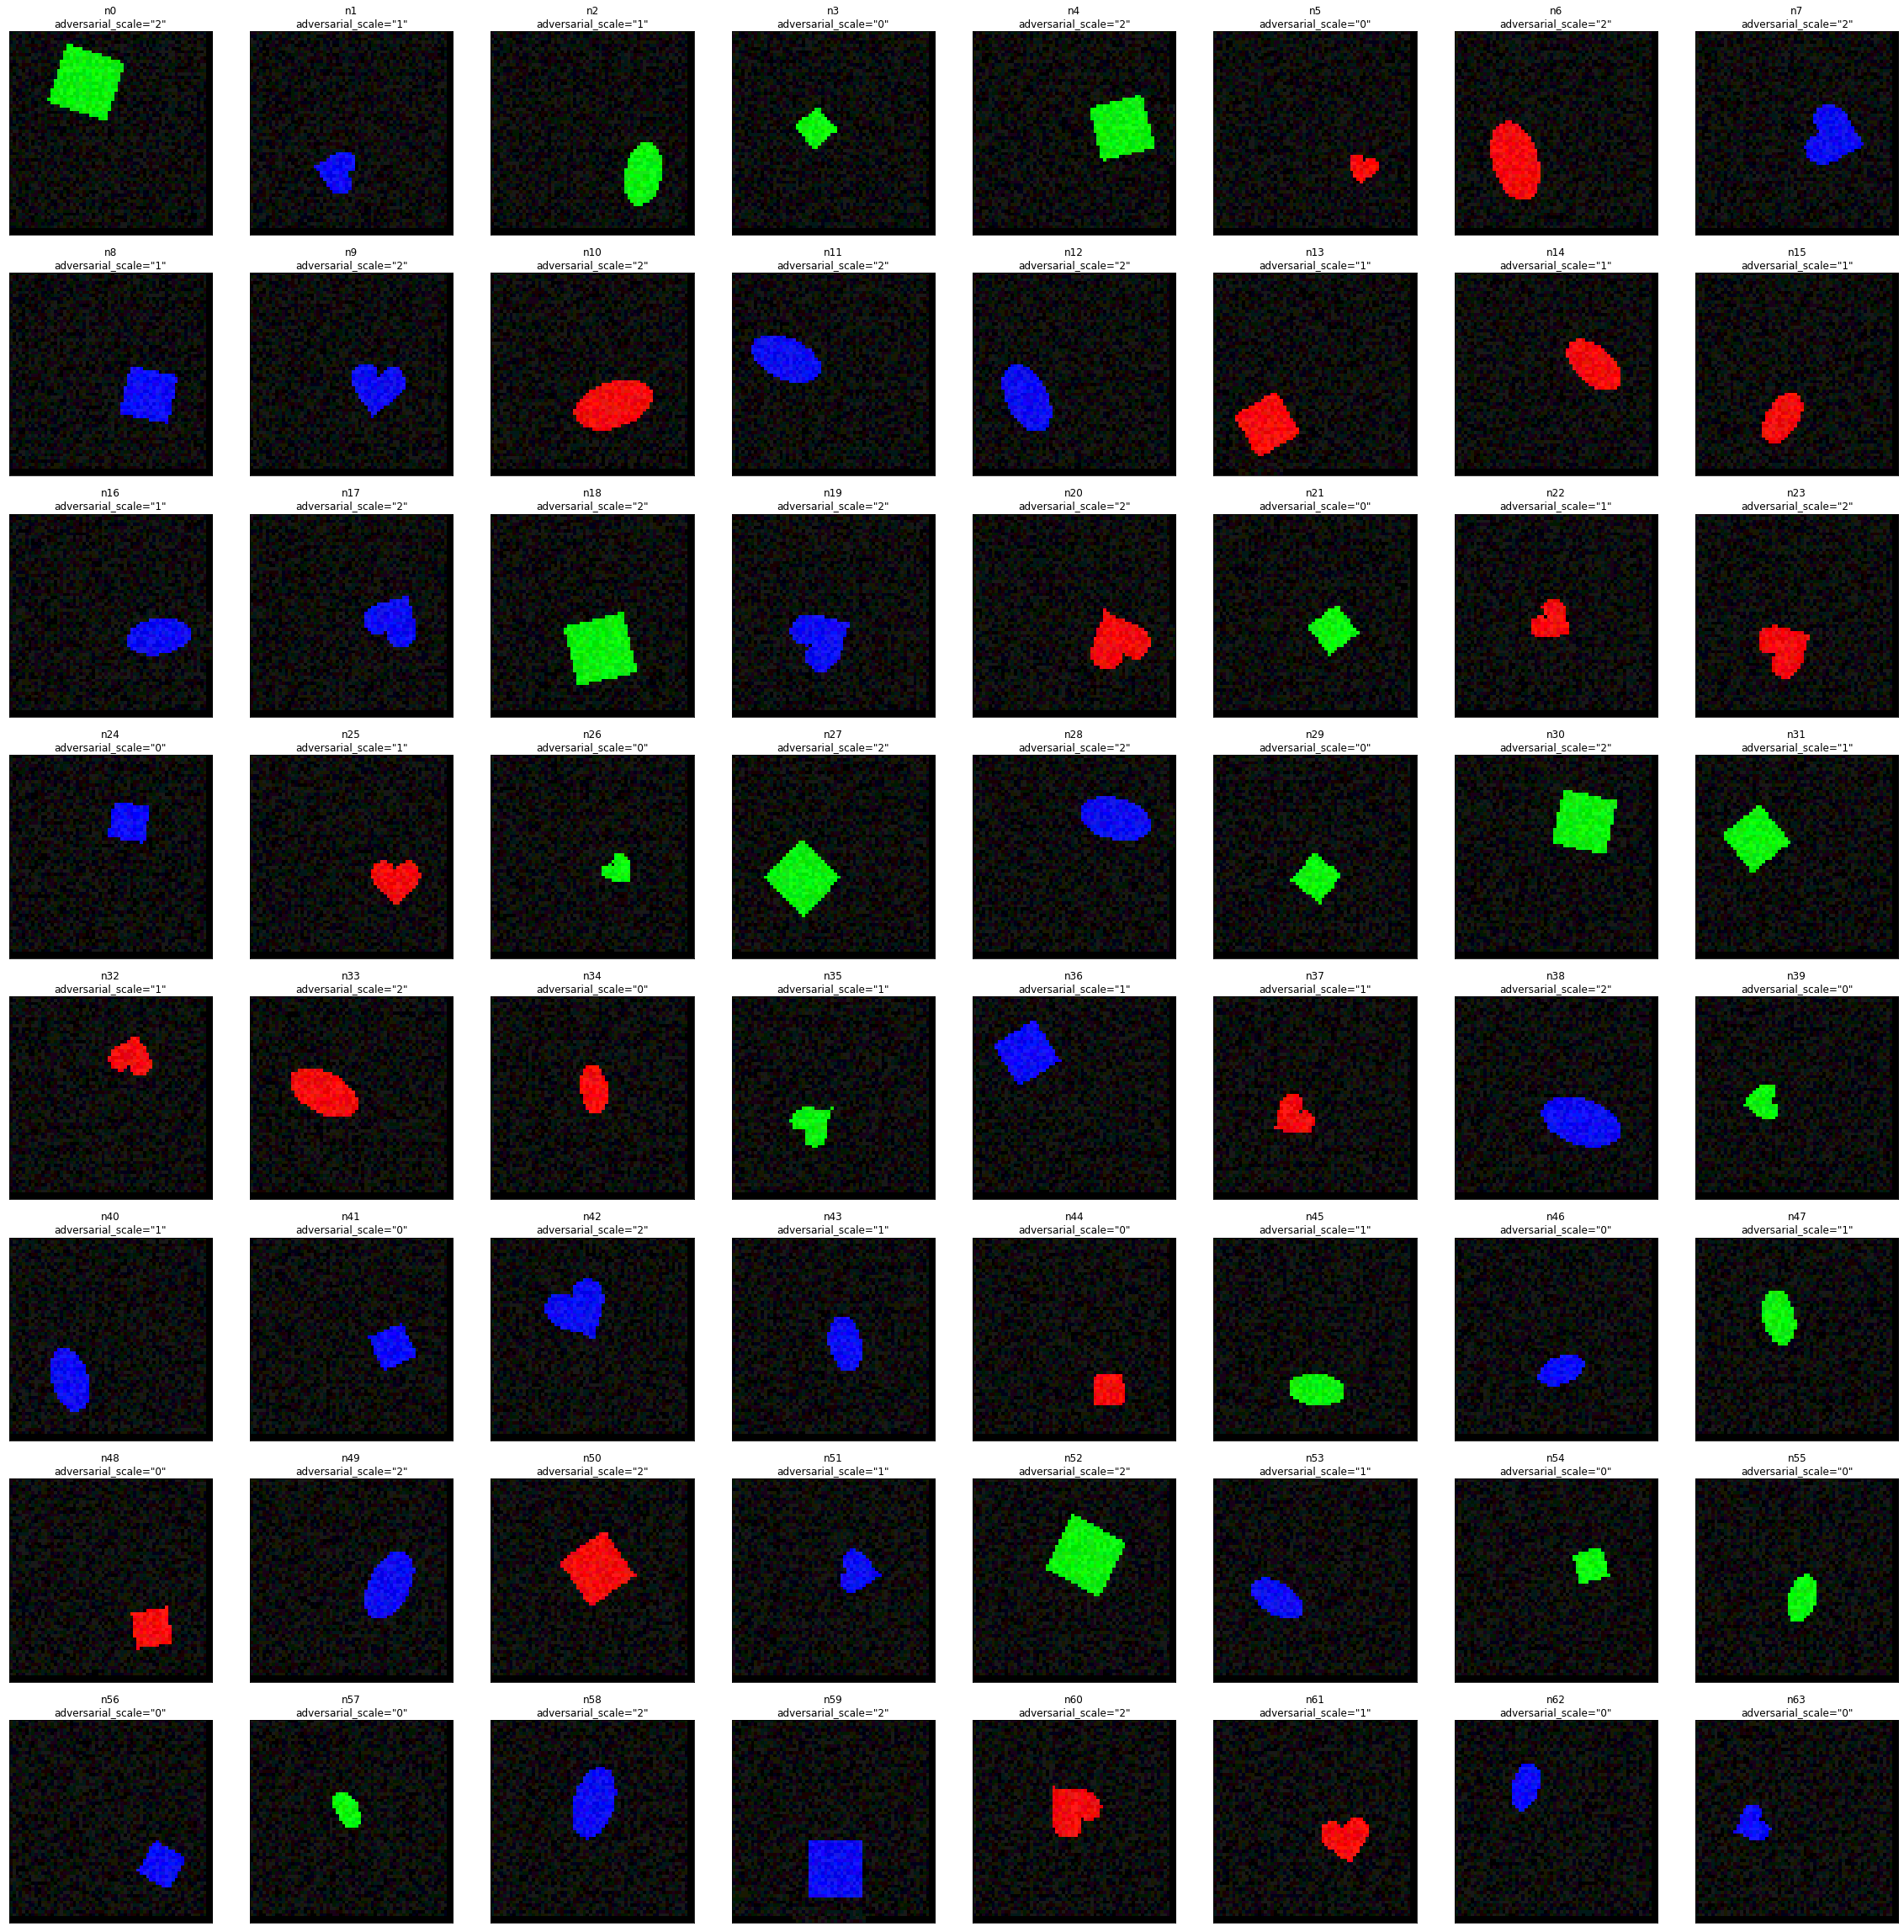

In [ ]:
adv_test_dataloaders = prepare_adversarial_dataloader_maker(
    target_cue=GROUND_TRUTH_CUE
)(model_to_train)

# this loop is here because 
# adv_test_dataloaders = {"adversarial_dataloader_name": adversarial_dataloader}
for adversarial_dataloader_name, adversarial_dataloader \
    in adv_test_dataloaders.items():

    utils.show_dataloader_first_batch(
        adversarial_dataloader, 
        [adversarial_dataloader_name]
    )

Just like in the de-biasing task we can create an experiment function that uses default factories.  

In [ ]:
def adversarial_exp(
    n_epochs,
    make_train_dataloader=datasets.prepare_default_dsprites_dataloaders_maker(
        one_dataloader_to_select=ADVERSARIALLY_ATTACKED_CUE
    ), 
    make_val_dataloaders=prepare_adversarial_dataloader_maker(
        split="test",
        dataset_size=TEST_DATASET_SIZE
    ), 
    make_test_dataloaders=datasets.prepare_default_dsprites_dataloaders_maker(
        is_multilabel=True,
        split="test",
        dataset_size=TEST_DATASET_SIZE
    ),
    make_model=models.prepare_resnet18_maker(), 
    make_criterion=train.make_ce_criterion, 
    do_train_func=train.do_default_train_func,
    make_optimizer=train.prepare_sgd_optimizer_maker(DEFAULT_START_LR),
    make_scheduler=train.prepare_exp_scheduler_maker(),
    make_metric=train.make_accuracy,
    random_seed=RANDOM_SEED,
    stop_after_epoch=None
):

    experiments.generic_experiment(
        n_epochs=n_epochs,
        make_train_dataloader=make_train_dataloader,
        make_val_dataloaders=make_val_dataloaders,
        make_test_dataloaders=make_test_dataloaders,
        make_model=make_model,
        make_metric=make_metric,
        make_criterion=make_criterion, 
        make_optimizer=make_optimizer,
        make_scheduler=make_scheduler,
        do_train_func=do_train_func,
        random_seed=random_seed,
        stop_after_epoch=stop_after_epoch
    )

'shape'

Let's run a default adversarial experiment:

Epoch 10/10 train mean stats:
    loss: 0.022604575084530548
    Accuracy: 0.992


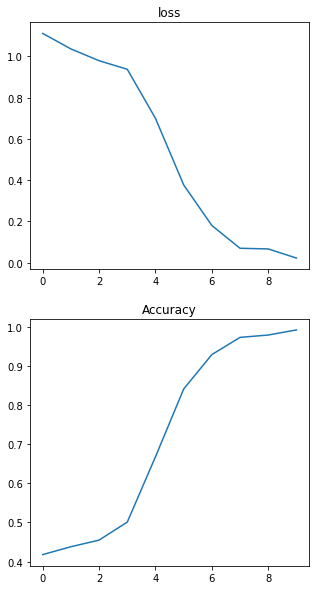

                                             
Epoch 10/10 val adversarial_shape mean stats:
    Accuracy: 0.312


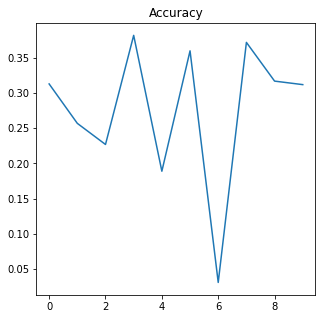

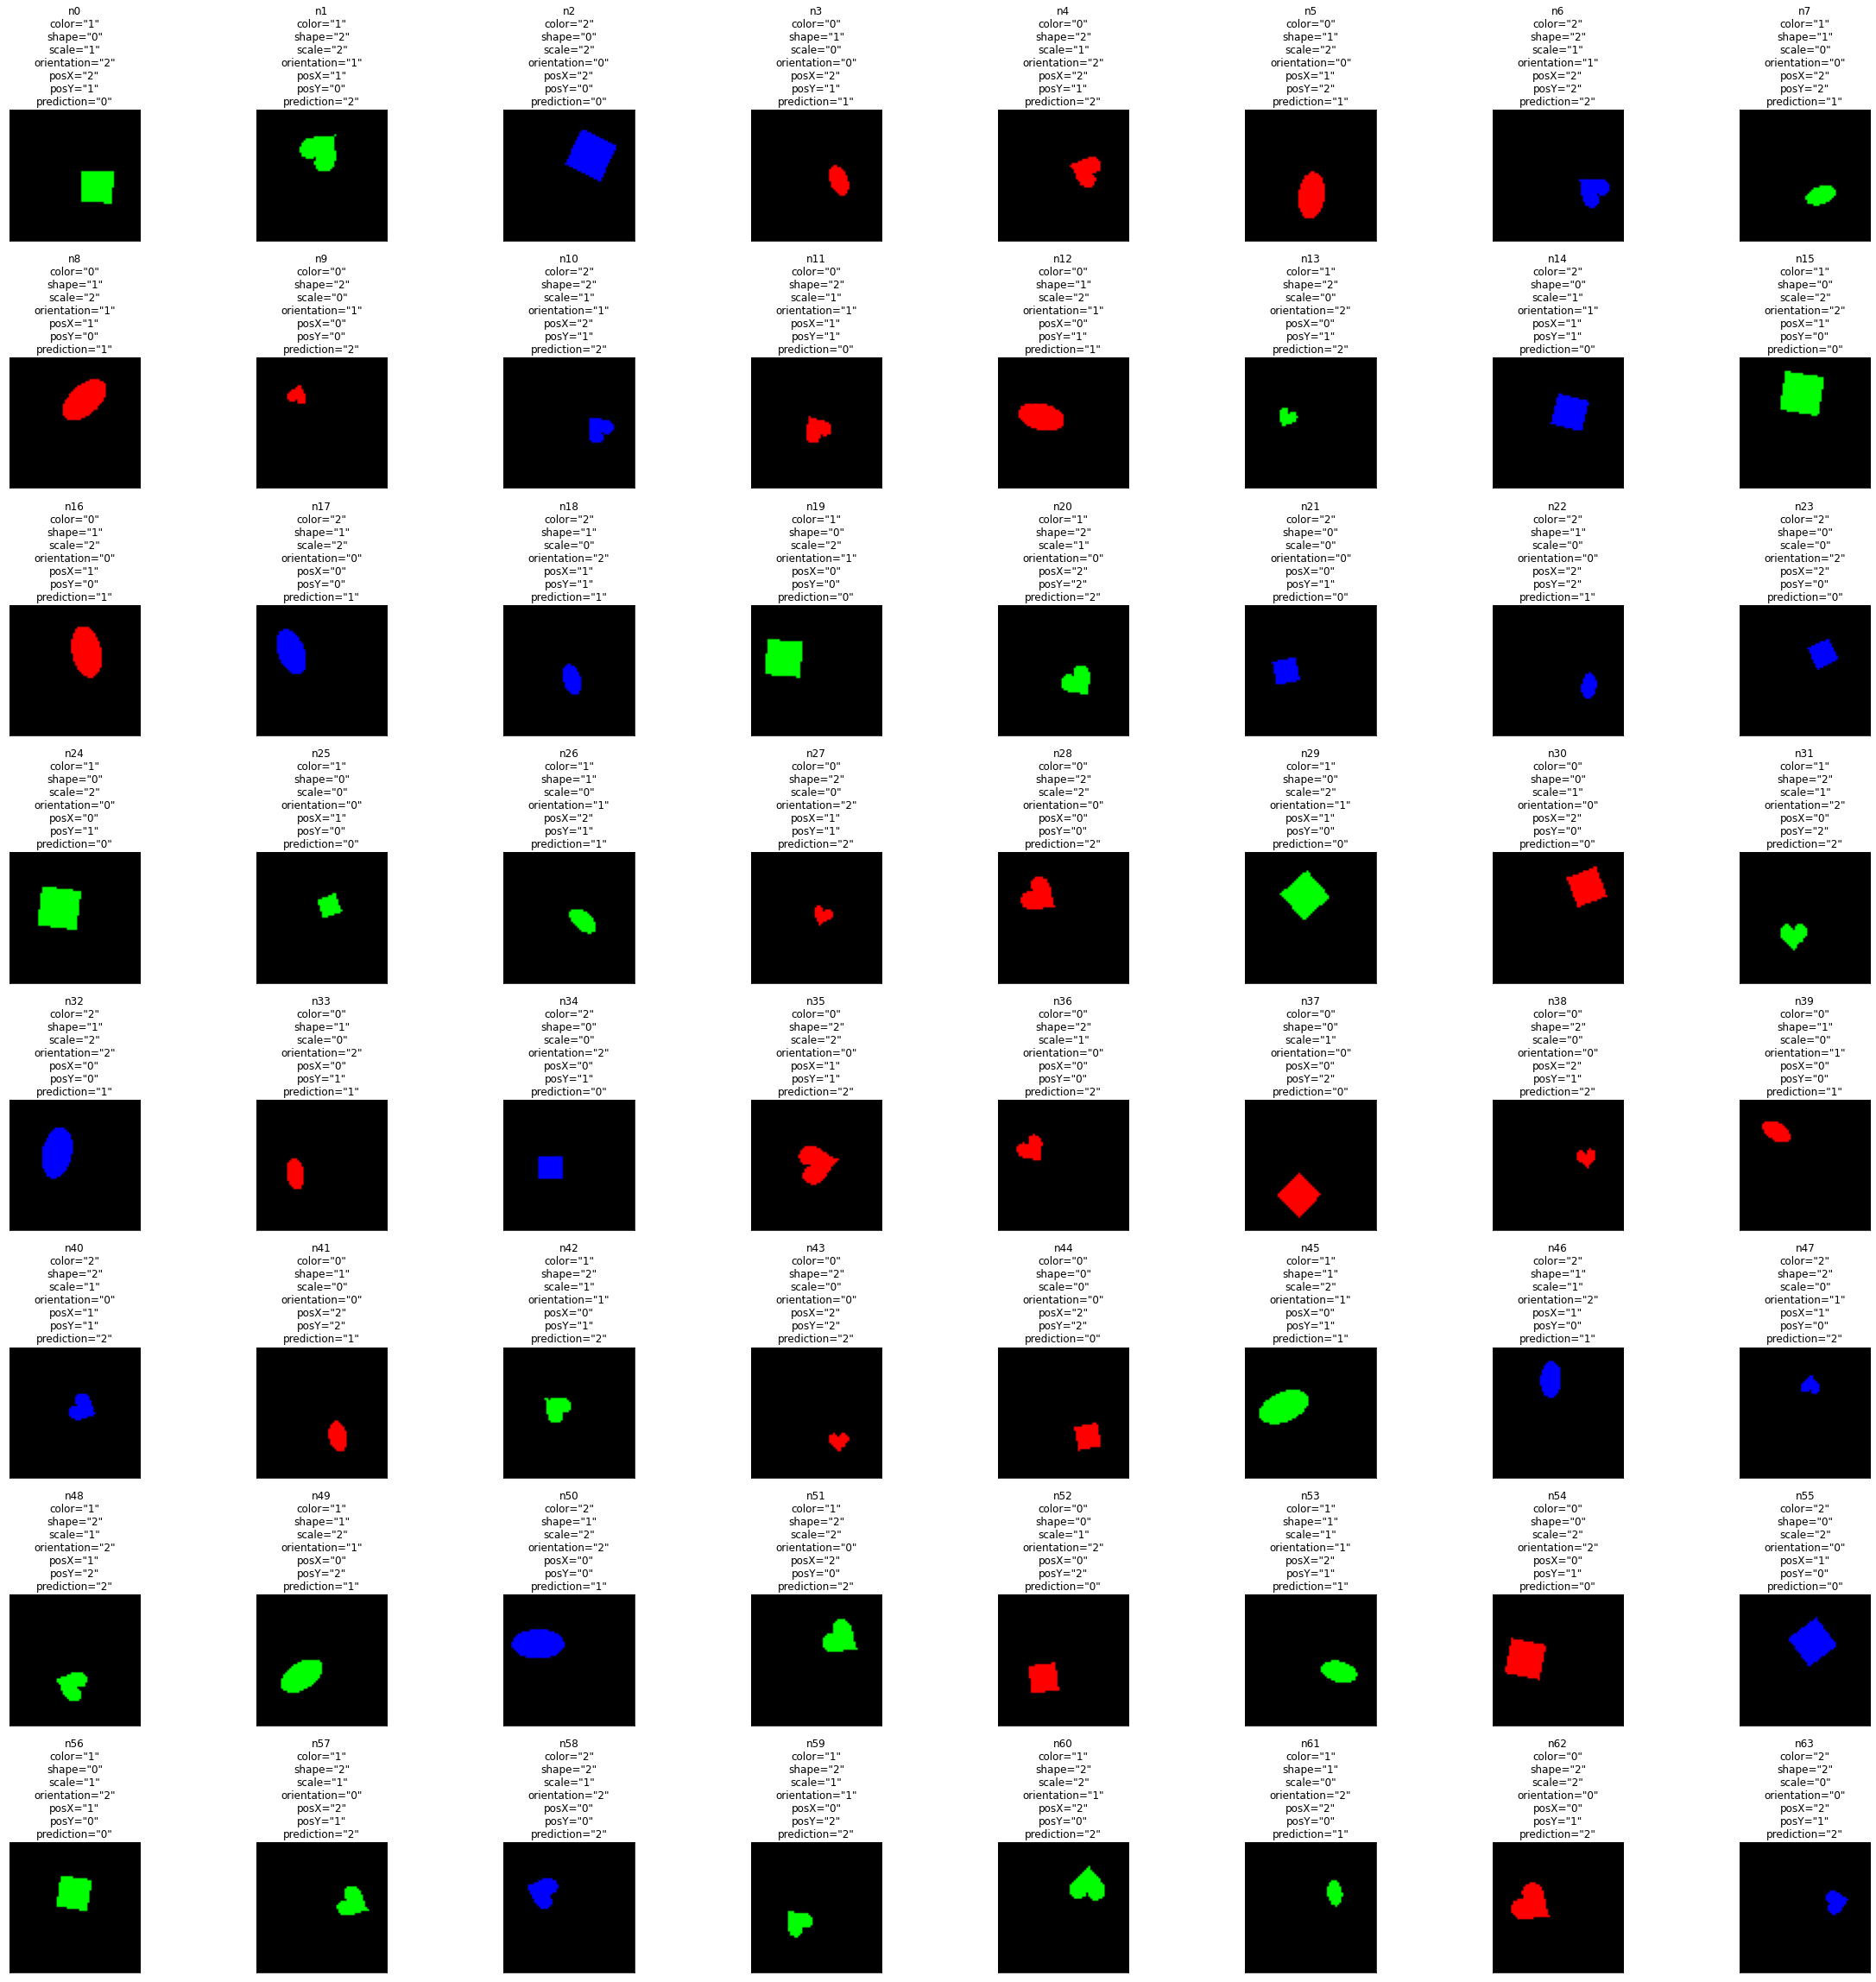

                            
Test on all_cues Accuracy for color: 0.341
Test on all_cues Accuracy for shape: 0.994
Test on all_cues Accuracy for scale: 0.333
Test on all_cues Accuracy for orientation: 0.332
Test on all_cues Accuracy for posX: 0.331
Test on all_cues Accuracy for posY: 0.331


In [ ]:
adversarial_exp(
    n_epochs=10
)

Adversarial accuracy for "ADVERSARIALLY_ATTACKED_CUE" on validation dataset is lower than random guess accuracy. We can try to increase it by performing adversarial training.  

To achieve this we need the following:

- adversarial criterion.
- do_adversarial_train_func .

Let's start with the adversarial criterion. It needs to compute adversarial input and use it for the computation of an adversarial loss.

### Compute adversarial loss in method "CriterionForAdversarialAttack.\_\_call\_\_" **(5 points)**:

In [ ]:
class CriterionForAdversarialAttack:
    
    def __init__(
        self, 
        attack: Callable,
        alpha: float,
        criterion: Callable
    ):
        """
        Initialize criterion for adversarial training.

        Args:

            attack (Callable): same as 
                for "AdversarialAttackDataloaderWrapper.__init__" method.
                Stored in "self.attack".

            alpha (float): an argument that will be used 
                by function "do_adversarial_train".
                Stored in "self.alpha".

            criterion (Callable): a function used for computing loss 
                for images and labels, or adversarial images 
                and the same labels in method "__call__" of this class.
                Stored in "self.criterion".
        """
        self.attack = attack
        self.alpha = alpha
        self.criterion = criterion

    def __call__(self, model, images, label):

        images.requires_grad = True
        pred = model(images)
        target_loss = self.criterion(pred, label)

        adversarial_loss = self.compute_adversarial_loss(
            model, 
            images, 
            label, 
            pred
        )

        return pred, target_loss, adversarial_loss, self.alpha

    def compute_adversarial_loss(
        self, 
        model: torch.nn.Module, 
        images: torch.tensor, 
        labels: torch.tensor, 
        preds: torch.tensor
    ) -> torch.tensor:
        """
        Compute an adversarial loss as L(adv_images, labels).
        Where "adv_images" are images attacked 
        by the "self.attack" (adversarial images),
        "labels" are labels for this images 
        (they are the same as for the unattacked images) 
        and "L" is "self.criterion".

        Args:

            self.*: see "__init__" method of this class.

            model (torch.nn.Module): a model 
                used to compute predictions for adversarial images.

            images (torch.tensor): input images that are attacked.

            labels (torch.tensor): labels for the <images> as well as 
                for the "adv_images".

            preds (torch.tensor): outputs of the <model> 
                after <images> are forwarded through it. 
                They are already computed because they were used 
                for the "target_loss" computation.

                Where "target_loss" is an argument 
                for nested function "do_optimizer_step"
                inside function "do_adversarial_train".

        Returns:

            adversarial_loss (torch.tensor): cameo
        """
        
        ######### ATTENTION PLEASE
        adversarial_images = self.attack(images, labels, model, preds, retain_graph=True)
        adversarial_preds = model(adversarial_images)
        adversarial_loss = self.criterion(adversarial_preds, labels)
        ######### THANK YOU FOR YOUR ATTENTION

        return adversarial_loss


def prepare_criterion_for_adversarial_attack_maker(
    attack, 
    alpha,
    criterion
):
    
    def make_criterion_for_adversarial_attack():
        return CriterionForAdversarialAttack(
            attack, 
            alpha,
            criterion
        )

    return make_criterion_for_adversarial_attack

Speaking about "do_adversarial_train", it should be similar to [do_default_train](https://github.com/AlexanderRubinstein/UT-TML/blob/e3a65b74526f5ef0a7197bdc8081cb0d046e0b85/src/train.py#L498-L563) with modifications to the way the final loss is computed.

### Compute final loss using outputs of the "CriterionForAdversarialAttack" and update model's weights **(5 points)**:

In [ ]:
def do_adversarial_train(
    model, 
    criterion, 
    optimizer, 
    images, 
    labels, 
    second_labels,  # needed for compatibility with de-biasing exp
    epoch_histories
):

    def do_optimizer_step(
        alpha: float, 
        target_loss: torch.tensor, 
        adversarial_loss: torch.tensor, 
        optimizer: object
    ) -> None:
        """
        Compute the final loss as described in paper 
        "EXPLAINING AND HARNESSING ADVERSARIAL EXAMPLES"
        [https://arxiv.org/pdf/1412.6572.pdf].
        Use its gradients to update the <model>'s weigths.

        Args:

            alpha (float): a weight for combining losses.

            target_loss (torch.tensor): a loss for the original task, 
                i.e. in the absence of any adversarial attacks.

            adversarial_loss (torch.tensor): a loss computed 
                by method "compute_adversarial_loss" 
                of class "CriterionForAdversarialAttack".

            optimizer (optimizer class): an optimizer 
                that updates model's weights.
        """

        ######### ATTENTION PLEASE
        optimizer.zero_grad()
        total_loss = alpha * target_loss + (1 - alpha) * adversarial_loss
        total_loss.backward()
        optimizer.step()
        ######### THANK YOU FOR YOUR ATTENTION

    assert isinstance(criterion, CriterionForAdversarialAttack)
    
    pred, target_loss, adversarial_loss, alpha = criterion(
        model, 
        images, 
        labels
    )

    do_optimizer_step(alpha, target_loss, adversarial_loss, optimizer)

    utils.append_to_list_in_dict(
        epoch_histories, 
        "target_loss", 
        target_loss.item()
    )
    utils.append_to_list_in_dict(
        epoch_histories, 
        "adversarial_loss", 
        adversarial_loss.item()
    )

    return pred, epoch_histories

Let's run an experiment using adversarial training (we use an ADAM optimizer just like in WeightedCrossEntropy exercise for the de-biasing task):

In [ ]:
adversarial_exp(
    n_epochs=10,
    make_criterion=prepare_criterion_for_adversarial_attack_maker(
        attack=AttackFGSM(eps=FGSM_EPS, criterion=train.make_ce_criterion()), 
        alpha=FGSM_ALPHA,
        criterion=train.make_ce_criterion()
    ),
    do_train_func=do_adversarial_train,
    make_optimizer=train.prepare_adam_optimizer_maker(0.01)
)


Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Loading cached default_dsprites_dataloaders from /tmp/ood_cache/default_dsprites_dataloaders_939d09271c96f8cf7475.pkl
Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Loading cached default_dsprites_dataloaders from /tmp/ood_cache/default_dsprites_dataloaders_a10d77455843fbf1d203.pkl
Reusing object from RAM with fingerprint dsprites_holder_693439d4be339e36364e
Reusing object from RAM with fingerprint default_dsprites_dataloaders_6049af145a21f36ab291


RuntimeError: ignored

### Report **(7 points)**

Which pros and cons has adversarial training with respect to vanilla training? 

For answering this question, consider the following aspects:
- Clean and adversarial accuracy.
- Computational complexity.
- Can you guarantee your safety against arbitrary adversarial attacks after performing adversarial training?

That's it! Good job!